<h1 STYLE="padding-left:1em;text-align: center;">Projet 04 : Anticipez les besoins en consommation électrique de bâtiments </h1> 

#  Introduction  
<p STYLE="padding-left:1em;text-align: justify;">Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.
<p STYLE="padding-left:1em;text-align: justify;"> Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire <b> les émissions de CO2 et la consommation totale d’énergie de bâtiments </b> pour lesquels elles n’ont pas encore été mesurées.
<p STYLE="padding-left:1em;text-align: justify;">Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)
<p STYLE="padding-left:1em;text-align: justify;">Vous cherchez également à évaluer l’intérêt de <b> l’ "ENERGY STAR Score" </b> pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.
    
<p STYLE="padding-left:1em;text-align: justify;"><b> Dans cette première partie du projet, nous allons réaliser un mettoyage du jeu de donnée puis une courte analyse exploratoire. L'objectif étant de sélectionner les variables pertinentes, ou d'en créer des nouvelles si besoins pour réaliser des prédictions sur les émissions de CO2 et les consommations d'énergie des bâtiments.   

# Sommaire
<a href="#1" STYLE="padding-left:1em;color:black"><b>Etape 1 : Importation des librairies et des fonctions graphiques</b></a><br>
<a href="#2" STYLE="padding-left:1em;color:black"><b>Etape 2 : Importation des données et observation</b></a><br>
<a href="#3" STYLE="padding-left:1em;color:black"><b>Etape 3 : Homogénéisation des jeux de données</b></a><br>
<a href="#3.1" STYLE="padding-left:2em;color:black">3.1 Comparaison des variables des deux jeux de données</a><br>
<a href="#3.2" STYLE="padding-left:2em;color:black">3.2 Transformation des jeux de données</a><br>
<a href="#3.3" STYLE="padding-left:2em;color:black">3.3 Fusion des deux jeux de données</a><br>
<a href="#3.4" STYLE="padding-left:2em;color:black">3.4 Préparation du jeux de données</a><br>
<a href="#3.4.1" STYLE="padding-left:3em;color:black">3.4.1 Bâtiments non résidentiels</a><br>
<a href="#3.4.2" STYLE="padding-left:3em;color:black">3.4.2 Suppresion des variables redondantes, peu renseignées et non utiles pour l'étude</a><br>
<a href="#3.4.2.1" STYLE="padding-left:4em;color:black">3.4.2.1 Observation des variables numériques et sélection des variables pour l'étude</a><br>
<a href="#3.4.2.2" STYLE="padding-left:4em;color:black">3.4.2.2 Observation des variables non numériques et sélection des variables pour l'étude</a><br>
<a href="#3.4.3" STYLE="padding-left:3em;color:black">3.4.3 Complétion des valeurs manquantes</a><br>
<a href="#3.4.4" STYLE="padding-left:3em;color:black">3.4.4 Moyenne des années 2015 et 2016</a><br>
<a href="#3.4.5" STYLE="padding-left:3em;color:black">3.4.5 Nettoyage du jeu de données</a><br>
<a href="#4" STYLE="padding-left:1em;color:black"><b>Etape 4 Exploration du jeu de données</b></a><br>
<a href="#4.1" STYLE="padding-left:2em;color:black">4.1 Analyse uni-variée des variables du jeu de données</a><br>
<a href="#4.2" STYLE="padding-left:2em;color:black">4.2 Analyse bi-variée des variables du jeu de données</a><br>
<a href="#4.3" STYLE="padding-left:2em;color:black">4.3 Analyse multi-variée des variables du jeu de données</a><br>
<a href="#4.4" STYLE="padding-left:2em;color:black">4.4 Projection des bâtiments sur la carte de Seattle</a><br>
<a href="#5" STYLE="padding-left:1em;color:black"><b>Etape 5 Finalisation du jeux de donnée</b></a><br>
<a href="#6" STYLE="padding-left:1em;color:black"><b>Etape 6 Export du jeu de donnée</b></a>

# <a STYLE="color:black" id="1">Etape 1 : Importation des librairies et des fonctions graphiques 

In [1]:
%matplotlib inline

from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from math import radians, cos, sin, asin, sqrt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 200)

<p STYLE="padding-left:1em;color:blue;"><b>Configuration générale des différents graphiques <font>

In [2]:
plt.rcdefaults()
font_title = {'color': 'blue','weight': 'bold','size': 14}
font_label = {'size': 12}
font_ticks = 12
font_legend = 10
# c = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b','#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
# colors = { x+1 : c[x]  for x in range(len(c))}
c = []
[c.append(plt.cm.tab20(i)) for i in range(20)]
    
def config_plt(plot = plt, ax = None, title = 'titre', X_name = 'x' , Y_name = 'y' , legend = ''):   
    if plot == plt :
        plot.title(title,fontdict=font_title)
        plot.xlabel(X_name,fontdict=font_label)
        plot.ylabel(Y_name,fontdict=font_label)
        plot.xticks(fontsize =font_ticks)
        plot.yticks(fontsize =font_ticks)
        if legend is not None:
            plot.legend(title = legend , fontsize =font_legend)
    else : 
# Sub-plot
        ax.set_title(title,fontdict=font_title)
        ax.set_xlabel(X_name,fontdict=font_label)
        ax.set_ylabel(Y_name,fontdict=font_label)
        ax.tick_params(axis='x', labelsize=font_ticks)
        ax.tick_params(axis='y', labelsize=font_ticks)
        if legend is not None: 
            ax.legend(title = legend , fontsize =font_legend)

In [3]:
def plot_scatter(DF,x_cols,cols, categorie= None,Nb_cols=2,length=None,width=None,x_lim=None,y_lim =None,title=None,x_name=None,y_name=None,legend=None):
    if np.array([cols]).size == 1:
        Nb_var = 1
        cols = [cols]
        x_cols = [x_cols]
    else :    
        Nb_var = len(cols) 
    Nb_row = int(0.5 + Nb_var/Nb_cols) 
    
    width = 4*Nb_cols
    length = 4*Nb_row
    fig = plt.figure(figsize=(width,length))    
    for i in range(0,Nb_var):
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        if categorie is None : 
            if len(x_cols)==1:
                axes.scatter(DF[x_cols[0]],DF[cols[i]],color = c[0],s=1.75)
            else : 
                axes.scatter(DF[x_cols[i]],DF[cols[i]],color = c[0],s=1.75)
        else :
            k=0
            for cat in DF[categorie].unique():
                DF_frac = DF[DF[categorie] == cat]
                if len(x_cols)==1:
                    axes.scatter(DF_frac[x_cols[0]],DF_frac[cols[i]],color = c[k],s=1.75 ,label = cat)
                else : 
                    axes.scatter(DF_frac[x_cols[i]],DF_frac[cols[i]],color = c[k],s=1.75, label = cat)
                k+=1
            legend = str(cat if label.get(cat) is None else label.get(cat))
        if title is None :    
            title_plt = ''
        else : 
            title_plt = [title if np.array([cols]).size == 1 else title[i]]
        if x_name is None : 
            x = str(x_cols[i] if label.get(x_cols[i]) is None else label.get(x_cols[i]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[i]
        if y_name is None : 
            y = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
        if x_lim is not None:
            axes.set_xlim(x_lim)
        if y_lim is not None:
            axes.set_ylim(y_lim)
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show() 

def plot_pie(DF , cols , Nb_cols = 2):
    if np.array([cols]).size == 1:
        cols = np.array([cols]) 
    Nb_row = int(len(cols)/Nb_cols+0.5)    
    fig = plt.figure(figsize=(5*Nb_cols,5*Nb_row)) 
    for i in range(0,len(cols)):
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        score = DF.groupby(by=DF[cols[i]])[cols[i]].count()
        X = score.index.values
        Y = score.values        
        title = 'Répartition du ' + str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        axes.pie(score, labels = X, autopct ='%0.1f%%', textprops = dict(color='black',size = 10, weight = 'bold'))
        axes.set_title(title,fontdict=font_title)
    fig.tight_layout()
    plt.show() 

def plot_bar(DF , cols , Nb_cols = 2,length = None,width = None, title = None ,x_name = None, y_name =None , legend = None ):
    if np.array([cols]).size == 1:
        Nb_var = 1
    else :    
        Nb_var = len(cols) 
    Nb_row = int(0.5 + Nb_var/Nb_cols)
    if width is None : 
        width = 4*Nb_cols
    if length is None:
        length = 4*Nb_row
    if DF[cols].nunique().max()>10 : 
        width = DF[cols].nunique().max()/3
    fig = plt.figure(figsize=(width,length))
        
    for i in range(0,Nb_var):
        if DF[cols].nunique().max()>10 : 
            width = DF[cols].nunique().max()/3
            fig = plt.figure(figsize=(width,length))
            
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        count = DF.groupby(by=DF[cols[i]])[cols[i]].count()
        X = count.index.values
        Y = count.values

        if title is None :    
            title_plt = 'Distribution :\n ' + str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            title_plt = [title if np.array([cols]).size == 1 else title[i]]
        if x_name is None : 
            x = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[i]
        if y_name is None : 
            y = 'Nombre de bâtiments '
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
        
        if len(X)<=10 : 
            axes.bar(X,Y,color=c[(range(len(X)))])        
            for j in range(0,len(X)):
                j = int(j)
                axes.bar(X,Y,width=0,color= c[j],label= X[j])
        else : 
            axes.bar(X,Y,color=c[0])
            axes.tick_params(axis='x',rotation = 90)
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show() 

def plot_hist(DF, cols, Nb_cols=1 , log ='No', title = None , x_name = None, y_name =None , legend = None ):         
    if np.array([cols]).size == 1:
        Nb_var = 1
    else : 
        Nb_var = int(len(cols))
    Nb_row = int(Nb_var/Nb_cols + 0.5)
    fig = plt.figure(figsize=(4*Nb_cols,4*Nb_row))               
    for i in range(0,Nb_var): 
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        DF_cols = DF[cols[i]]
        bins = np.arange(DF_cols.min(),DF_cols.max(),2)
        if log == 'yes' : 
            DF_cols = np.log(DF_cols)
            bins = np.arange(DF_cols.min(),DF_cols.max(),np.log(1.1))    
        if len(bins) > 100 : 
            bins = 100    
        if title is None :    
            title_plt = 'Distribution :\n ' + str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            title_plt = [title if np.array([cols]).size == 1 else title[i]]
        if x_name is None : 
            x = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[i]
        if y_name is None : 
            y = 'Nombre de bâtiments '
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
                     
# Tracer des histogrammes
        axes.hist(DF_cols,bins = bins)
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show()  

def plot_boxplot(DF, categorie, cols , Nb_cols=2 , x_lim = None , y_lim = None):
    if np.array([categorie]).size == 1:
        Nb_var = 1
        categorie = [categorie]
    else : 
        Nb_var = int(len(categorie))
    Nb_row = int(Nb_var/Nb_cols + 0.5)
    fig = plt.figure(figsize=(5*Nb_cols,5*Nb_row))

    for i in range(0,Nb_var):
        fig.add_subplot(Nb_row,Nb_cols,i+1)
        axes = sns.boxplot(data=DF, x=categorie[i], y=cols)
        if x_lim is not None:
            axes.set_xlim(x_lim)
        if y_lim is not None:
            axes.set_ylim(y_lim)
        title = 'Influence du '+ str(categorie[i] if label.get(categorie[i]) is None else label.get(categorie[i]))+' sur\n '+ str(cols if label.get(cols) is None else label.get(cols))    
        x = str(categorie[i] if label.get(categorie[i]) is None else label.get(categorie[i]))
        y = 'Distribution de ' + str(cols if label.get(cols) is None else label.get(cols))
        config_plt(plot = plt , title = title , X_name = x, Y_name = y , legend = None)
        plt.xticks(rotation = 90)
    fig.tight_layout()
    plt.show()

def mat_cor(DF , cols = None ,sort_var = None):
    if cols is None:
        DF_mat_corr = DF.corr()
        fig=plt.figure(figsize=(DF.columns.size/2,4))
    else : 
        DF_mat_corr = DF[cols].corr()
        fig=plt.figure(figsize=(np.array(cols).size/2,4))
    
    if sort_var is not None:
        DF_cols = DF_mat_corr[sort_var].sort_values(ascending = False).index
        DF_mat_corr = DF_mat_corr.loc[DF_cols,DF_cols]
    
    mask = np.zeros_like(DF_mat_corr)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(DF_mat_corr, mask = mask,cmap='coolwarm',annot=True, 
                     annot_kws={"size":8 ,'weight':'bold','color':'black'}) 
    
    title = "Coefficients de corrélation de Pearson"
    config_plt(plot = None , ax = ax , title = title , X_name = None , Y_name = None , legend = None)
    plt.show()

# <a STYLE="color:black" id="2">Etape 2 : Importation des données et observation 

In [4]:
DF_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
DF_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [5]:
print('le jeu de données 2015 comporte {} lignes et {} variables'.format(DF_2015.shape[0],DF_2015.shape[1]))
print('le jeu de données 2016 comporte {} lignes et {} variables'.format(DF_2016.shape[0],DF_2016.shape[1]))
display(DF_2015.sample(5))
display(DF_2016.sample(5))

le jeu de données 2015 comporte 3340 lignes et 47 variables
le jeu de données 2016 comporte 3376 lignes et 46 variables


OSEBuildingID  DataYear          BuildingType  \
698           19623      2015        NonResidential   
545             732      2015        NonResidential   
3043          27843      2015  Multifamily MR (5-9)   
1052          20604      2015        NonResidential   
1509          22066      2015  Multifamily LR (1-4)   

              PrimaryPropertyType            PropertyName  \
698   Small- and Mid-Sized Office       SHILSHOLE LANDING   
545                  Retail Store  FRED MEYER - GREENWOOD   
3043         Mid-Rise Multifamily     OLYMPIAN APARTMENTS   
1052        Distribution Center\n               WAREHOUSE   
1509         Low-Rise Multifamily                 HELEN V   

     TaxParcelIdentificationNumber  \
698                      467000920   
545                     9231900160   
3043                    7234600545   
1052                    1824049012   
1509                    2254501275   

                                                                                                                                                                Location  \
698   {'latitude': '47.67447195', 'longitude': '-122.40777514', 'human_address': '{"address": "6315 SEAVIEW AVE NW", "city": "SEATTLE", "state": "WA", "zip": "98107"}'}   
545         {'latitude': '47.69195845', 'longitude': '-122.3587219', 'human_address': '{"address": "100 NW 85TH ST", "city": "SEATTLE", "state": "WA", "zip": "98117"}'}   
3043     {'latitude': '47.61499187', 'longitude': '-122.3109693', 'human_address': '{"address": "1605 E MADISON ST", "city": "SEATTLE", "state": "WA", "zip": "98122"}'}   
1052         {'latitude': '47.56487224', 'longitude': '-122.3407794', 'human_address': '{"address": "20 S IDAHO ST", "city": "SEATTLE", "state": "WA", "zip": "98134"}'}   
1509       {'latitude': '47.61241097', 'longitude': '-122.3144627', 'human_address': '{"address": "1321 E UNION ST", "city": "SEATTLE", "state": "WA", "zip": "98122"}'}   

      CouncilDistrictCode      Neighborhood  YearBuilt  NumberofBuildings  \
698                     6           BALLARD       1963                  1   
545                     6         NORTHWEST       1970                  1   
3043                    3           CENTRAL       1912                  1   
1052                    2  GREATER DUWAMISH       1955                  1   
1509                    3           CENTRAL       1909                  1   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
698              3.0             22325                   0   
545              1.0            141890               35545   
3043             6.0             48700                4056   
1052             1.0             26680                   0   
1509             3.0             24316                   0   

      PropertyGFABuilding(s)  \
698                    22325   
545                   106345   
3043                   44644   
1052                   26680   
1509                   24316   

                                                   ListOfAllPropertyUseTypes  \
698   Medical Office, Office, Other, Other - Services, Parking, Retail Store   
545                         Parking, Retail Store, Supermarket/Grocery Store   
3043                                                     Multifamily Housing   
1052                                                     Distribution Center   
1509                                            Multifamily Housing, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
698                  Office                    18000.0   
545            Retail Store                   168972.0   
3043    Multifamily Housing                    44644.0   
1052    Distribution Center                    33987.0   
1509    Multifamily Housing                    20316.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
698                Medical Office                           1800.0   
545     Supermarket/Grocery Store              

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
2004          24115      2016        NonResidential   Distribution Center   
1921          23828      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
625             841      2016        NonResidential                 Other   
896           20168      2016        NonResidential           K-12 School   
1994          24089      2016        NonResidential          Retail Store   

              PropertyName               Address     City State  ZipCode  \
2004      Stusser Electric      660 S Andover St  Seattle    WA  98108.0   
1921                  2760            2760 nw 85  Seattle    WA  98117.0   
625             EMP Museum  325 5th Avenue North  Seattle    WA  98109.0   
896   Spruce Street School      914 Virginia St.  Seattle    WA  98101.0   
1994      646 S HOLGATE ST      646 S HOLGATE ST  Seattle    WA  98134.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
2004                    7886100365                    2   
1921                    3566800215                    6   
625                     1991200005                    7   
896                     0660001365                    7   
1994                    7666203450                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
2004       GREATER DUWAMISH  47.56823 -122.32506       1959   
1921                BALLARD  47.69069 -122.39256       1991   
625   MAGNOLIA / QUEEN ANNE  47.62147 -122.34817       1999   
896                DOWNTOWN  47.61687 -122.33533       1995   
1994       GREATER DUWAMISH  47.58698 -122.32397       1944   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2004                1.0               1             33600                   0   
1921                1.0               3             33733                   0   
625                 1.0               5            141718                   0   
896                 1.0               3             22860                   0   
1994                1.0               1             25880                   0   

      PropertyGFABuilding(s)  \
2004                   33600   
1921                   33733   
625                   141718   
896                    22860   
1994                   25880   

                              ListOfAllPropertyUseTypes  \
2004                        Distribution Center, Office   
1921                       Multifamily Housing, Parking   
625   Other - Entertainment/Public Assembly, Restaurant   
896                                         K-12 School   
1994                                       Retail Store   

                     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
2004                    Distribution Center                    24000.0   
1921                    Multifamily Housing                    24435.0   
625   Other - Entertainment/Public Assembly                   134197.0   
896                             K-12 School                    22860.0   
1994                           Retail Store                    25880.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
2004                       Office                           9600.0   
1921                      Parking                           9298.0   
625                    Restaurant                           5803.0   
896                           NaN                              NaN   
1994                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
2004                         NaN                             NaN   
1921                         NaN                             NaN   
625                          NaN                             NaN   
896                          NaN                             NaN   
1994                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARS

In [6]:
print(DF_2015.info())
print('\n')
print(DF_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

<p STYLE="padding-left:1em;color:blue;"><b>Affichage du taux de valeurs renseigné dans chaque variable

In [7]:
# Calcul du taux de remplissage des variables du dataset + seuil  

def Taux_non_nuls(DF, seuil = 0 , PRINT = 'no_print' , out = None) :
# Comptage des valeurs non nulles dans les différentes colonnes 
    Nb_rows , Nb_cols = DF.shape
    Taux_data_non_nuls = 100*(DF.notnull().sum()/Nb_rows)
    Taux_data_non_nuls = Taux_data_non_nuls.sort_values(ascending=False).reset_index()
    Taux_data_non_nuls.columns = ['variables', '% non nuls']
    
    # filtre avec seuil
    Taux_data_non_nuls = Taux_data_non_nuls[Taux_data_non_nuls['% non nuls']>=seuil]
    Percent_keep_cols = round( 100*len(Taux_data_non_nuls)/Nb_cols , 2 )
    print(f'{Percent_keep_cols}% des colonnes, soit {len(Taux_data_non_nuls)} ont un taux de remplissage >= {seuil}%')     

    # Tracer du graphique en barre    
    if PRINT == 'print': 
        fig = plt.figure(figsize=(15, len(Taux_data_non_nuls)/3))
        sns.barplot(x='% non nuls',y='variables',data=Taux_data_non_nuls,color='black')
        plt.xlabel('Taux de remplissage des colonnes',fontdict=font_label)
        plt.ylabel('variables',fontdict=font_label)
        plt.xticks(fontsize=font_ticks)
        plt.yticks(fontsize=font_ticks)
        plt.grid(axis='x')
        plt.show()
    if out is None:
        Taux_data_non_nuls = None
    return Taux_data_non_nuls
    
# Filtrage du dataset en fonction du seuil appliqué sur le taux de remplissage     
def DF_Select_cols_seuil(DF,seuil = 0,PRINT = 'no_print'):
    DF_filtrer = Taux_non_nuls(DF,seuil,PRINT)
    Cols = DF_filtrer.columns
    cols = DF_filtrer[Cols[0]].values
    DF_clean = DF[cols]
    DF_clean.reset_index(drop=True,inplace=True)
    return DF_clean

100.0% des colonnes, soit 47 ont un taux de remplissage >= 0%


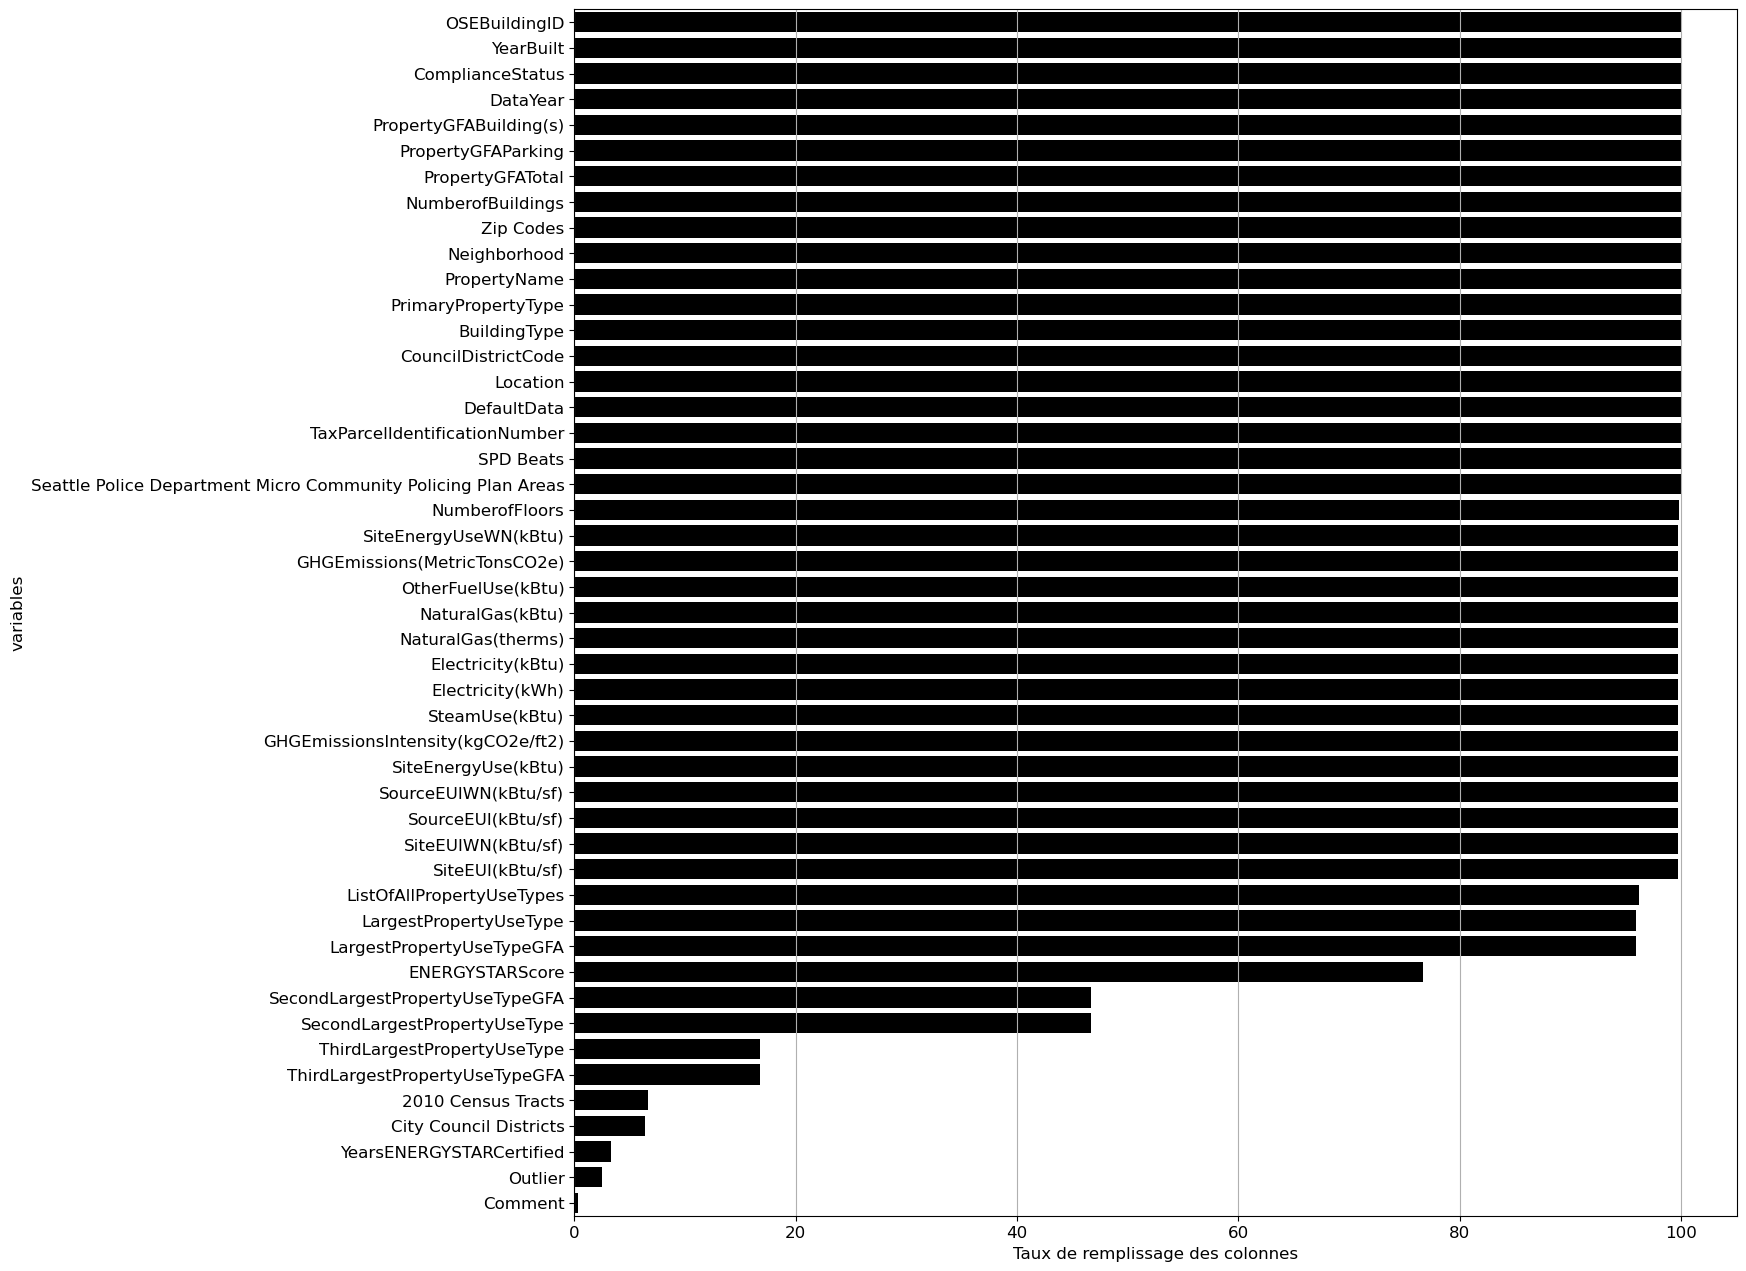

100.0% des colonnes, soit 46 ont un taux de remplissage >= 0%


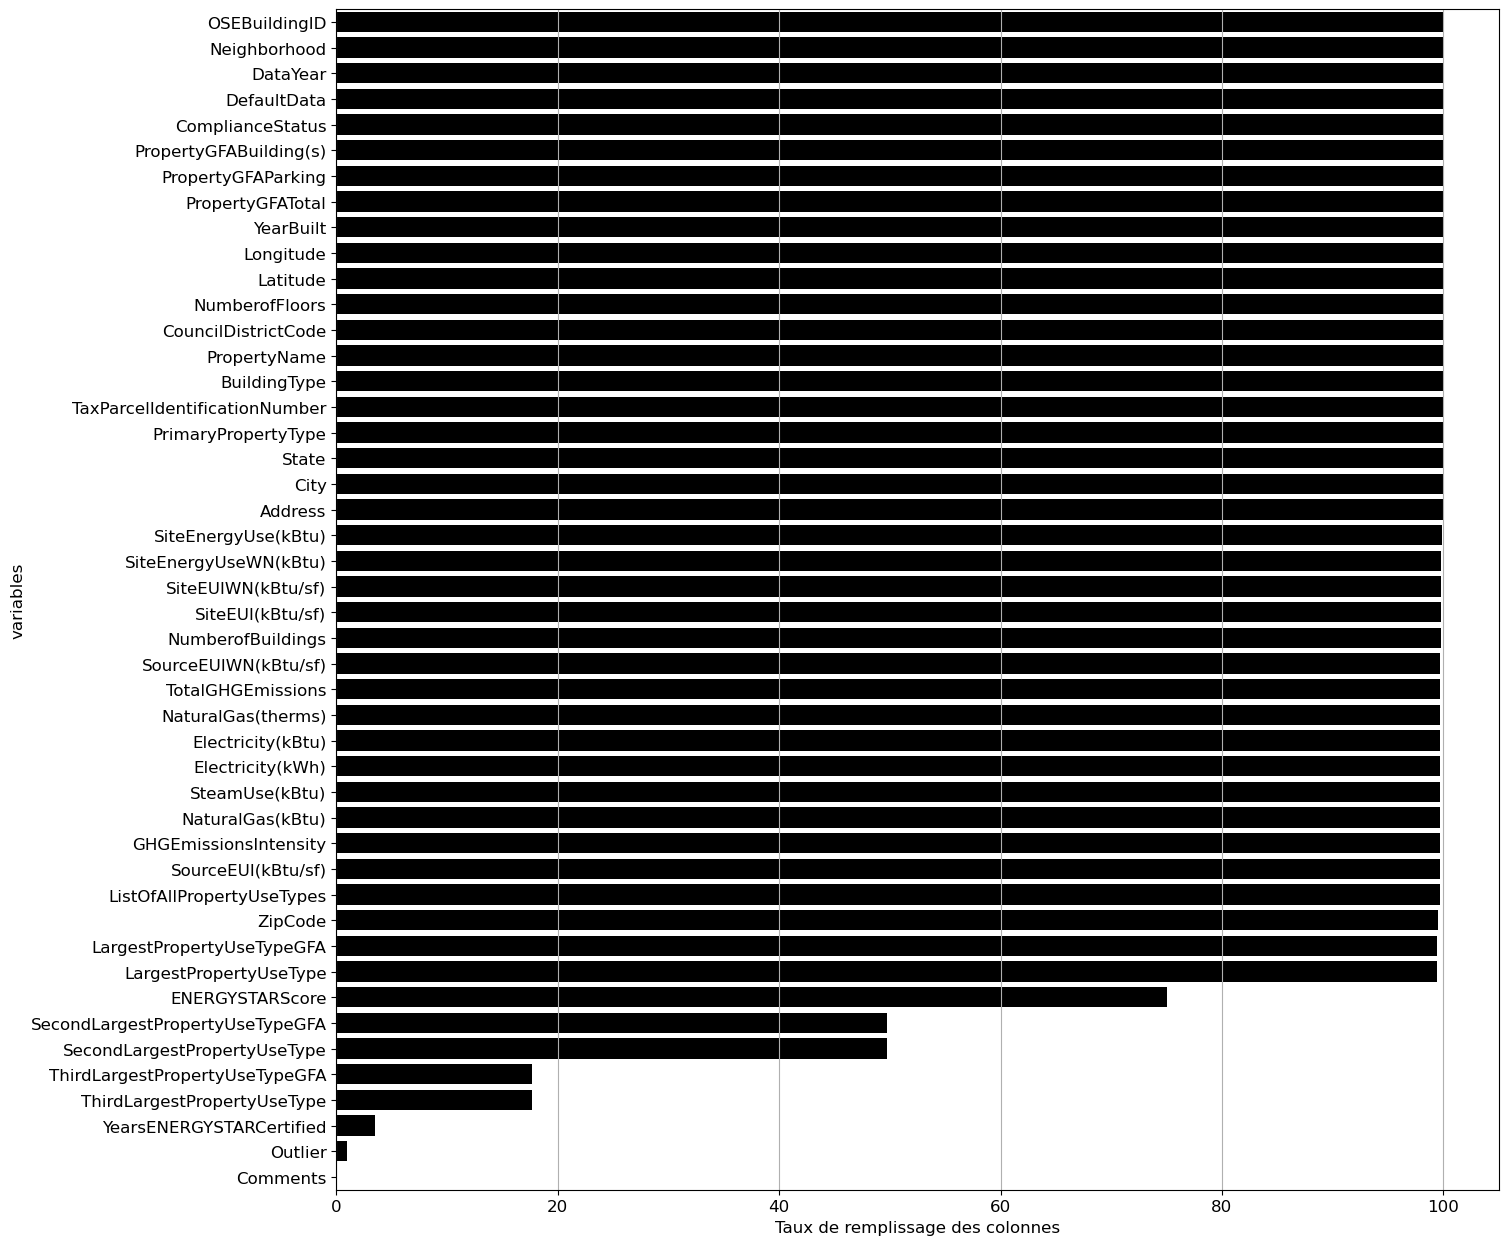

In [8]:
Taux_non_nuls(DF_2015, PRINT = 'print')
Taux_non_nuls(DF_2016, PRINT = 'print')

# <a STYLE="color:black" id="3">Etape 3 : Homogénéisation des jeux de données
## <a STYLE="color:black" id="3.1">3.1 Comparaison des variables des deux jeux de données
<p STYLE="padding-left:1em;color:blue;"><b> Il s'agit de comparer les deux jeux de données et d'observer leurs différences 

In [9]:
def diff_DF_cols(DF_1,DF_2):
    cols_1 = DF_1.columns
    cols_2 = DF_2.columns
    diff_1 = list(set(cols_1)-set(cols_2))
    diff_2 = list(set(cols_2)-set(cols_1))
    DF_diff = pd.DataFrame(diff_1, columns = ['cols_1']).join(pd.DataFrame(diff_2, columns = ['cols_2']))
    return DF_diff

In [10]:
DF_cols_diff = diff_DF_cols(DF_2015,DF_2016)
DF_cols_diff

cols_1  \
0                                                       Location   
1                                                      SPD Beats   
2                                         City Council Districts   
3                                   GHGEmissions(MetricTonsCO2e)   
4                                                      Zip Codes   
5                                             OtherFuelUse(kBtu)   
6                                                        Comment   
7                                             2010 Census Tracts   
8  Seattle Police Department Micro Community Policing Plan Areas   
9                              GHGEmissionsIntensity(kgCO2e/ft2)   

                  cols_2  
0                Address  
1                   City  
2                ZipCode  
3  GHGEmissionsIntensity  
4               Latitude  
5              Longitude  
6                  State  
7               Comments  
8      TotalGHGEmissions  
9                    NaN

In [11]:
DF_2015[DF_2015.notnull()==True][DF_cols_diff.iloc[:,0].to_list()].sample(1)

Location  \
955  {'latitude': '47.66086337', 'longitude': '-122.318502', 'human_address': '{"address": "905 NE 45TH ST", "city": "SEATTLE", "state": "WA", "zip": "98105"}'}   

     SPD Beats  City Council Districts  GHGEmissions(MetricTonsCO2e)  \
955       38.0                     NaN                         22.95   

     Zip Codes  OtherFuelUse(kBtu) Comment  2010 Census Tracts  \
955      18383                 0.0     NaN                 NaN   

     Seattle Police Department Micro Community Policing Plan Areas  \
955                                                           60.0   

     GHGEmissionsIntensity(kgCO2e/ft2)  
955                               0.05

In [12]:
DF_2016[DF_2016.notnull()==True][DF_cols_diff.iloc[:-1,1].to_list()].sample(1)

Address     City  ZipCode  GHGEmissionsIntensity  Latitude  \
3302  1525 9th ave  Seattle  98101.0                   1.25  47.61324   

      Longitude State  Comments  TotalGHGEmissions  
3302 -122.33223    WA       NaN             622.23

## <a STYLE="color:black" id="3.2">3.2 Transformation des jeux de données
<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Il s'agit de dissocier la variable "location" (2015) qui d'une part contient de nombreuses informations de localisation et d'autres part, est décomposée dans le jeu de données de 2016  

In [13]:
def transform_cols(DF):
    DF_new = DF.copy()
    for index, item in DF_new['Location'].iteritems():
        DF_new['Location'].iloc[index] = literal_eval(str(item))
    DF_new = pd.concat([DF_new.drop(['Location'], axis=1), DF_new['Location'].apply(pd.Series)], axis=1)
    
    for index, item in DF_new['human_address'].iteritems():
        DF_new['human_address'].iloc[index] = literal_eval(str(item))
    DF_new = pd.concat([DF_new.drop(['human_address'], axis=1), DF_new['human_address'].apply(pd.Series)],axis=1)

    return DF_new

In [14]:
DF_2015_new = transform_cols(DF_2015)
DF_2015_new.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  MAYFLOWER PARK HOTEL                     659000030                    7   
1       PARAMOUNT HOTEL                     659000220                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                       Hotel                  Hotel   
1  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   

   NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
0         1272388.0                 0.0                        249.43   
1         4448985.0                 0.0                        263.51   

   GHGEmissionsIntensity(kgCO2e/ft2) DefaultData Comment ComplianceStatus  \
0                               2.64          No     NaN        Compliant   
1                               2.38          No     NaN        Compliant   

  Outlier  2010 Census Tracts  \
0     NaN                 NaN   
1     NaN                 NaN   

   Seattle Police Department Micro Community Policing Plan Areas  \
0                                                           14.0   
1                                                           14.0   

   City Council Districts  SPD Beats  Zip Codes     latitude      longitude  \
0                     NaN       31.0      18081  47.61219025  -122.33799744   
1                     NaN       31.0      18081  47.61310583  -122.33335756   

         address     city state    zip  
0  405 OLIVE WAY  SEATTLE    WA  98101  
1    724 PINE ST  SEATTLE    WA  98101

In [15]:
info = pd.DataFrame([DF_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),
              DF_2016['GHGEmissionsIntensity'].describe(),
              DF_2015['GHGEmissions(MetricTonsCO2e)'].describe(),
              DF_2016['TotalGHGEmissions'].describe()])
info = info.reset_index().rename(index= {0 : 2015 , 1:2016 , 2:2015 , 3:2016 }).T
info

2015                   2016  \
index  GHGEmissionsIntensity(kgCO2e/ft2)  GHGEmissionsIntensity   
count                             3330.0                 3367.0   
mean                            0.985339               1.175916   
std                             1.637172               1.821452   
min                                  0.0                  -0.02   
25%                                 0.08                   0.21   
50%                                 0.46                   0.61   
75%                                 1.18                   1.37   
max                                31.38                  34.09   

                               2015               2016  
index  GHGEmissions(MetricTonsCO2e)  TotalGHGEmissions  
count                        3330.0             3367.0  
mean                     110.094102         119.723971  
std                      409.450179         538.832227  
min                             0.0               -0.8  
25%                           9.265              9.495  
50%                           32.74              33.92  
75%                         88.6425              93.94  
max                        11824.89           16870.98

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Nous observons que les pairs de variables <span STYLE="color:gray;" ><i> ( "GHGEmissionsIntensity(kgCO2e/ft2)" - "GHGEmissionsIntensity" ) & ( "GHGEmissions(MetricTonsCO2e)" - "TotalGHGEmissions" )</i></span> sont similaires.

In [16]:
cols_names_rep = {'GHGEmissionsIntensity(kgCO2e/ft2)' : 'GHGEmissionsIntensity','state':'State', 'zip':'ZipCode', 
                  'GHGEmissions(MetricTonsCO2e)' : 'TotalGHGEmissions','city':'City','address':'Address',
                  'Comments':'Comment','longitude':'Longitude','latitude':'Latitude'  
                 }
DF_2015_new.rename(columns = cols_names_rep,inplace=True)
DF_2016.rename(columns = cols_names_rep,inplace=True)
diff_DF_cols(DF_2015_new,DF_2016)

cols_1 cols_2
0                                                      SPD Beats    NaN
1                                         City Council Districts    NaN
2                                                      Zip Codes    NaN
3                                             OtherFuelUse(kBtu)    NaN
4                                             2010 Census Tracts    NaN
5  Seattle Police Department Micro Community Policing Plan Areas    NaN

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Nous observons, après la transformation du jeu de données de 2015, la présence de variables qui ne sont pas présentes dans le jeu de données 2016. Ces variables vont être supprimées.      

In [17]:
def Supp_cols(DF, cols):
    if np.array([cols]).size == 1:
        cols = np.array([cols])        
    for col in cols:
        DF = DF.drop(col,axis=1,errors='ignore')
    return DF

In [18]:
DF_2015_clean = Supp_cols(DF_2015_new,['City Council Districts','SPD Beats','Zip Codes','OtherFuelUse(kBtu)',
                       'Seattle Police Department Micro Community Policing Plan Areas','2010 Census Tracts'])

In [19]:
diff_DF_cols(DF_2015_clean,DF_2016)

Empty DataFrame
Columns: [cols_1, cols_2]
Index: []

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Les variables des deux jeux de données étant à présent identiques, nous pouvons les regrouper en un seul jeu de données

## <a STYLE="color:black" id="3.3">3.3 Fusion des deux jeux de données

In [20]:
pd.DataFrame([DF_2015_clean.dtypes, DF_2016.dtypes])
DF_2015_clean[['Latitude','Longitude', 'ZipCode']] = DF_2015_clean[['Latitude','Longitude', 'ZipCode']].astype('float64')

In [21]:
data = pd.concat([DF_2015_clean,DF_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
data.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  MAYFLOWER PARK HOTEL                     659000030                    7   
1       PARAMOUNT HOTEL                     659000220                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                1.0            12.0   
1     DOWNTOWN       1996                1.0            11.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                       Hotel                  Hotel   
1  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity DefaultData  \
0         1272388.0             249.43                   2.64          No   
1         4448985.0             263.51                   2.38          No   

  Comment ComplianceStatus Outlier   Latitude   Longitude        Address  \
0     NaN        Compliant     NaN  47.612190 -122.337997  405 OLIVE WAY   
1     NaN        Compliant     NaN  47.613106 -122.333358    724 PINE ST   

      City State  ZipCode  
0  SEATTLE    WA  98101.0  
1  SEATTLE    WA  98101.0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

100.0% des colonnes, soit 46 ont un taux de remplissage >= 0%


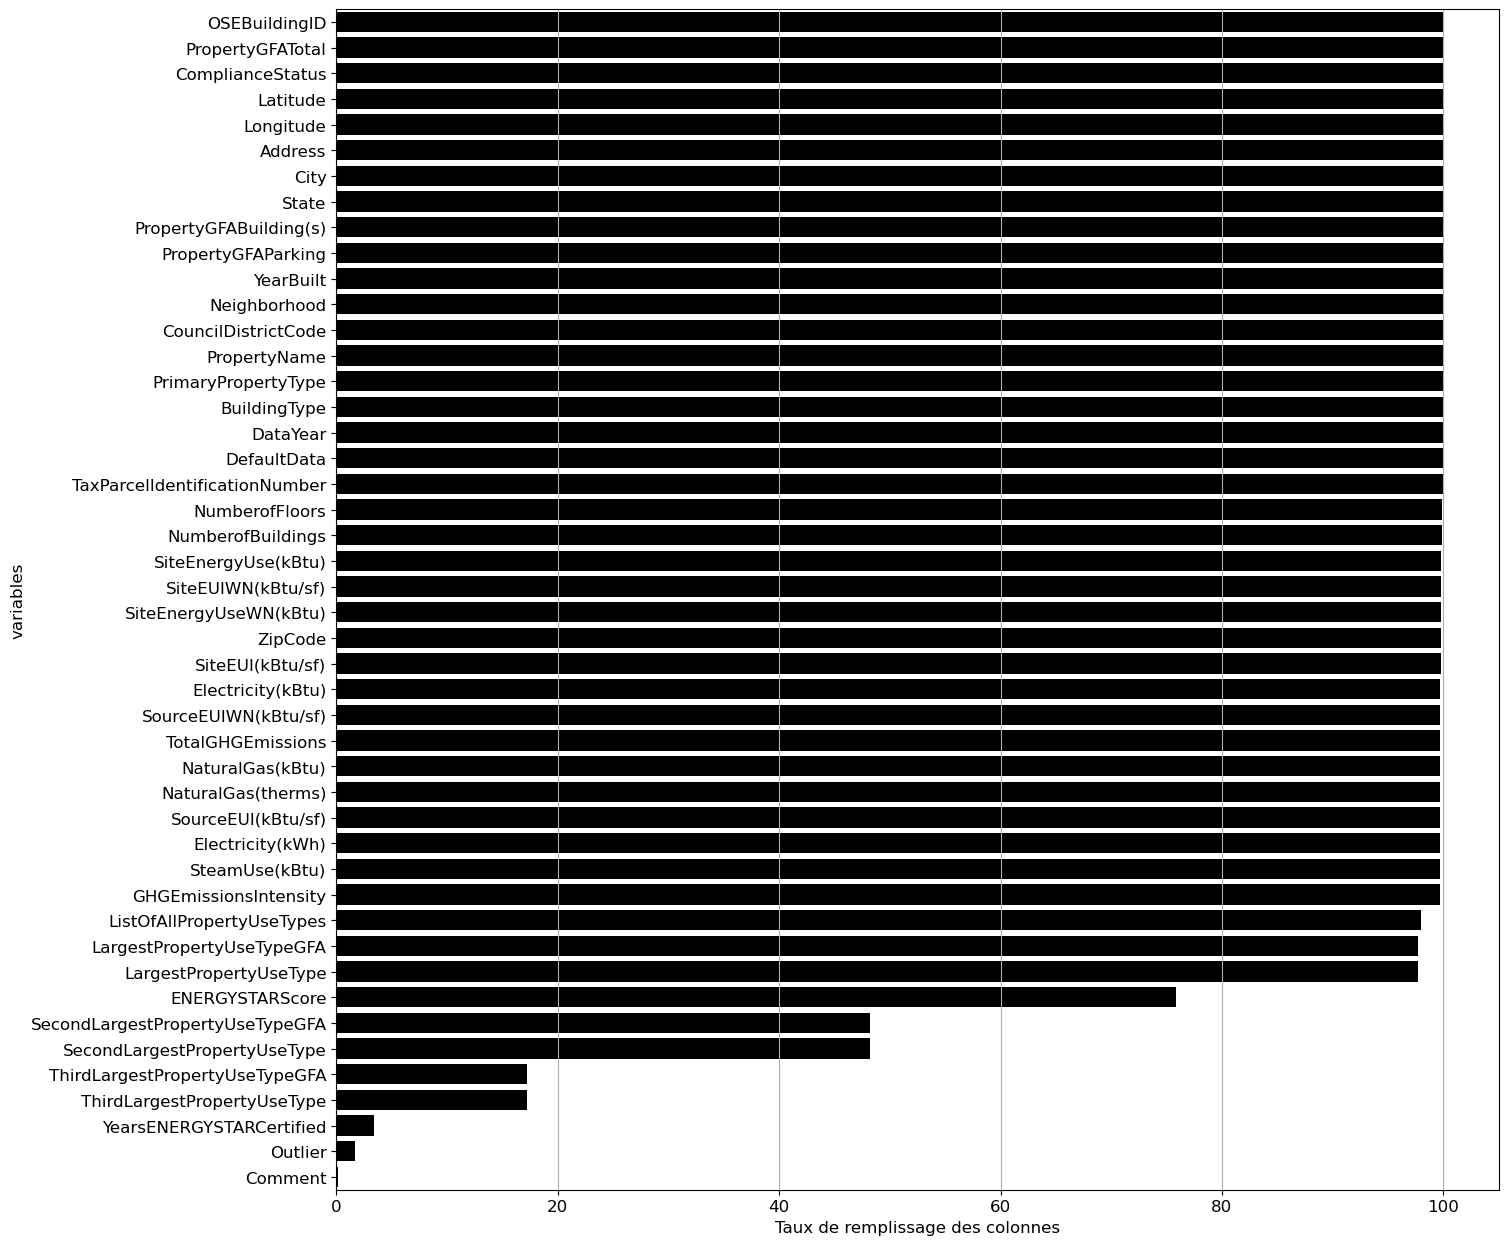

In [23]:
Taux_non_nuls(data, PRINT = 'print')

In [24]:
data.describe()

OSEBuildingID    DataYear  CouncilDistrictCode    YearBuilt  \
count    6716.000000  6716.00000          6716.000000  6716.000000   
mean    20867.420488  2015.50268             4.445057  1968.101549   
std     11878.968174     0.50003             2.123749    33.020391   
min         1.000000  2015.00000             1.000000  1900.000000   
25%     19934.000000  2015.00000             3.000000  1948.000000   
50%     23064.000000  2016.00000             4.000000  1974.000000   
75%     25868.250000  2016.00000             7.000000  1996.000000   
max     50226.000000  2016.00000             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        6708.000000     6708.000000      6.716000e+03   
mean            1.071407        4.695736      9.281410e+04   
std             1.593505        5.476218      1.875062e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        2.000000      2.848700e+04   
50%             1.000000        4.000000      4.400800e+04   
75%             1.000000        5.000000      8.943125e+04   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         6716.000000            6.716000e+03               6.560000e+03   
mean          9519.597975            8.329450e+04               7.707936e+04   
std          33868.050881            1.733470e+05               1.681617e+05   
min             -3.000000           -5.055000e+04               5.656000e+03   
25%              0.000000            2.727300e+04               2.501600e+04   
50%              0.000000            4.218500e+04               3.953000e+04   
75%              0.000000            8.112000e+04               7.417800e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      3238.000000                     1156.000000   
mean                      28074.100153                    11262.497750   
std                       53473.984688                    26287.655182   
min                           0.000000                        0.000000   
25%                        4993.000000                     2325.000000   
50%                       10631.000000                     5039.000000   
75%                       26462.000000                    10270.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      5093.000000       6699.000000         6700.000000   
mean         67.906342         54.182341           57.308522   
std          27.012124         55.101657           56.390651   
min           1.000000          0.000000            0.000000   
25%          52.000000         27.600000           29.600000   
50%          75.000000         38.000000           40.900000   
75%          90.000000         60.200000           64.925001   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         6697.000000           6697.000000         6.701000e+03   
mean           133.510303            138.356802         5.194673e+06   
std            135.677195            135.302508         1.813648e+07   
min             -2.000000             -2.100000         0.000000e+00   
25%             74.000000             79.199997         9.200689e+05   
50%             95.600000            102.099998         1.791071e+06   
75%            143.900000            149.800000         4.135280e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           6.700000e+03    6.697000e+03      6.697000e+03   
mean            5.240110e+06    2.625076e+05      1.052458e+06   
std  

## <a STYLE="color:black" id="3.4">3.4 Préparation du jeux de données
### <a STYLE="padding-left:1em;color:black" id="3.4.1">3.4.1 Bâtiments non résidentiels
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Dans le projet, il est précisé que les bâtiments destinés à l'habitation sont exclus de l'étude.  

In [25]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [26]:
data_clean = data[~data['BuildingType'].str.contains('Multifamily')]
data_clean['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [27]:
data_clean[(data_clean['PrimaryPropertyType'].str.contains('Multifamily')==True) |
           (data_clean['LargestPropertyUseType'].str.contains('Multifamily')==True)|
          (data_clean['SecondLargestPropertyUseType'].str.contains('Multifamily')==True)|
          (data_clean['ThirdLargestPropertyUseType'].str.contains('Multifamily')==True)][['BuildingType',
    'PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]

BuildingType          PrimaryPropertyType LargestPropertyUseType  \
163   NonResidential           Mixed Use Property    Multifamily Housing   
290           Campus           Mixed Use Property           Retail Store   
443   NonResidential           Mixed Use Property           Retail Store   
468   NonResidential  Small- and Mid-Sized Office                 Office   
490   NonResidential           Mixed Use Property                Parking   
...              ...                          ...                    ...   
3087  NonResidential           Mixed Use Property    Multifamily Housing   
3134  NonResidential           Mixed Use Property                Parking   
3163  NonResidential           Mixed Use Property                 Office   
3199  NonResidential                 Large Office                 Office   
3312  NonResidential  Small- and Mid-Sized Office                 Office   

               SecondLargestPropertyUseType ThirdLargestPropertyUseType  
163               Supermarket/Grocery Store                     Parking  
290                  Other - Restaurant/Bar         Multifamily Housing  
443                                 Parking         Multifamily Housing  
468              Non-Refrigerated Warehouse         Multifamily Housing  
490                     Multifamily Housing                       Hotel  
...                                     ...                         ...  
3087  Other - Entertainment/Public Assembly                         NaN  
3134              Supermarket/Grocery Store         Multifamily Housing  
3163                    Multifamily Housing                     Parking  
3199                                Parking         Multifamily Housing  
3312                                Parking         Multifamily Housing  

[69 rows x 5 columns]

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Nous remarquons tout de même la présence de zones destinées à l'habitation associées à d'autres usages dans les autres variables décrivant l'utilisation du bâtiment. A ce stade, nous ne supprimons pas ces données car elles sont associées à d'autres utilisations du bâtiments.         

In [28]:
print(f'le jeux de données comporte {data_clean.shape[0]} lignes ({round(100*data_clean.shape[0]/data.shape[0],2)} %) et {data_clean.shape[1]} variables')

le jeux de données comporte 3318 lignes (49.4 %) et 46 variables


### <a STYLE="color:black;padding-left:1em" id="3.4.2">3.4.2 Suppresion des variables redondantes, peu renseignées et non utiles pour l'étude
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Pour une question d'homogénéité, nous gardons les variables décrites avec l'unité 'kBtu'. Les variables contenant le suffixe "WN" qui décrivent l'émission de gaz à effet de serre et  la consommation d'énergie normalisées par rapport à un effet climatique (moyenne sur 30 ans) sont égalements éliminées. 

In [29]:
data_clean_cols = Supp_cols(data_clean, ['NaturalGas(therms)','Electricity(kWh)'])

In [30]:
Cols_WN = data_clean_cols.columns[data_clean_cols.columns.str.contains('wn',case=False)==True]

In [31]:
data_clean_cols=Supp_cols(data_clean_cols, Cols_WN)

In [32]:
print(data_clean['State'].unique())
print(data_clean['City'].unique())
print(data_clean['ZipCode'].unique())

['WA']
['SEATTLE' 'Seattle']
[98101. 98121. 98104. 98118. 98105. 98112. 98125. 98109. 98103. 98199.
 98115. 98107. 98144. 98119. 98122. 98126. 98133. 98146. 98106. 98108.
 98134. 98117. 98136. 98116. 98177. 98102. 98155. 98178. 98154. 98070.
 98033. 98111. 98191. 98164. 98195. 98185. 98181. 98168. 98006. 98124.
 98053. 98013. 98114. 98165. 98011. 98113. 98020. 98145.    nan]


In [33]:
data_clean_cols = Supp_cols(data_clean_cols, ['Outlier','Comment','State','City'])
data_clean_cols.shape

(3318, 37)

### <a STYLE="color:black;padding-left:2em" id="3.4.2.1">3.4.2.1 Observation des variables numériques et sélection des variables pour l'étude

In [34]:
DF_num = data_clean_cols.select_dtypes(include=['int64','float64'])
DF_num.head()

OSEBuildingID  DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  \
0              1      2015                    7       1927                1.0   
1              2      2015                    7       1996                1.0   
2              3      2015                    7       1969                1.0   
3              5      2015                    7       1926                1.0   
4              8      2015                    7       1980                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0            12.0             88434                   0   
1            11.0            103566               15064   
2            41.0            961990                   0   
3            10.0             61320                   0   
4            18.0            119890               12460   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   88434                    88434.0   
1                   88502                    83880.0   
2                  961990                   757243.0   
3                   61320                    61320.0   
4                  107430                   123445.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              NaN                             NaN   
1                          15064.0                          4622.0   
2                         100000.0                             0.0   
3                              NaN                             NaN   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
0             65.0              78.9               173.5            6981428.0   
1             51.0              94.4               191.3            8354235.0   
2             18.0              96.6               242.7           73130656.0   
3              1.0             460.4               636.3           28229320.0   
4             67.0             120.1               228.8           14829099.0   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0       2023032.0          3686160.0         1272388.0             249.43   
1             0.0          3905411.0         4448985.0             263.51   
2      19660404.0         49762435.0         3709900.0            2061.48   
3      23458518.0          2769023.0         2001894.0            1936.34   
4             0.0          6066245.0         8763105.0             507.70   

   GHGEmissionsIntensity   Latitude   Longitude  ZipCode  
0                   2.64  47.612190 -122.337997  98101.0  
1                   2.38  47.613106 -122.333358  98101.0  
2                   1.92  47.613349 -122.337699  98101.0  
3                  31.38  47.614216 -122.336609  98101.0  
4                   4.02  47.613754 -122.340924  98121.0

In [35]:
percent = pd.DataFrame(data_clean_cols['SteamUse(kBtu)']/data_clean_cols['SiteEnergyUse(kBtu)'],columns=['%steam'])
percent['%electricity'] =  data_clean_cols['Electricity(kBtu)']/data_clean_cols['SiteEnergyUse(kBtu)']
percent['%gaz'] =  data_clean_cols['NaturalGas(kBtu)']/data_clean_cols['SiteEnergyUse(kBtu)'] 
percent['total'] = percent.sum(axis=1)
percent.head(50)

%steam  %electricity      %gaz     total
0   0.289773      0.527995  0.182253  1.000022
1   0.000000      0.467477  0.532542  1.000019
2   0.268839      0.680459  0.050730  1.000028
3   0.830998      0.098090  0.070915  1.000004
4   0.000000      0.409077  0.590940  1.000017
5   0.000000      0.603303  0.396722  1.000025
6   0.000000      0.428557  0.571461  1.000018
7   0.311718      0.639276  0.049032  1.000026
8   0.000000      0.582222  0.417802  1.000024
10  0.246167      0.430543  0.323308  1.000018
11  0.195778      0.687618  0.116632  1.000029
12  0.291920      0.237256  0.470834  1.000010
13  0.207398      0.617705  0.174923  1.000026
14  0.411129      0.381779  0.207108  1.000016
15  0.041734      0.958306  0.000000  1.000040
16  0.425329      0.511419  0.063273  1.000021
17  0.000000      0.659210  0.340817  1.000027
18  0.234619      0.504423  0.260979  1.000021
19  0.408598      0.228252  0.363159  1.000009
20  0.000000      0.502486  0.497535  1.000021
21  0.000000      0.386593  0.613424  1.000016
22  0.000000      0.626905  0.373120  1.000025
23  0.000000      0.581001  0.419024  1.000024
24  0.000000      0.468022  0.531998  1.000019
25  0.000000      1.000042  0.000000  1.000042
26  0.000000      0.103259  0.896746  1.000004
27  0.000000      0.522683  0.477339  1.000022
28  0.000000      0.307661  0.692351  1.000013
29  0.000000      0.524274  0.475748  1.000022
30  0.000000      0.267652  0.732359  1.000011
31  0.000000      1.000041  0.000000  1.000041
32  0.000000      0.339337  0.660677  1.000014
33  0.000000      0.440212  0.559806  1.000018
34  0.000000      0.889186  0.110850  1.000036
35  0.000000      1.000041  0.000000  1.000041
36  0.000000      0.774315  0.225717  1.000032
37  0.000000      0.250823  0.749187  1.000010
38  0.000000      0.709762  0.290267  1.000029
39  0.000000      0.573525  0.426499  1.000024
40  0.000000      0.380529  0.619487  1.000016
41  0.000000      0.748703  0.251328  1.000031
42  0.000000      0.785963  0.214069  1.000033
43  0.000000      1.000041  0.000000  1.000041
44       NaN           NaN       NaN  0.000000
45  0.000000      1.000041  0.000000  1.000041
46  0.000000      0.339710  0.660304  1.000014
48  0.000000      0.878103  0.121934  1.000037
49  0.190138      0.527679  0.282204  1.000022
50  0.000000      0.605734  0.394291  1.000025
51  0.000000      0.256686  0.743324  1.000011

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Suppression des variables redondantes et non pertinentes et création d'une variable décrivant l'age du bâtiment, le type d'énergie utilisé et la quantité d'énergie produite pour alimenter les bâtiments. Nous supprimons également les variables liées aux relevés de consommations d'énergie des bâtiments.   

In [36]:
data_clean_cols['ElectricityUse'] = data_clean_cols['Electricity(kBtu)'].apply(lambda x : '1' if x>0 else '0')
data_clean_cols['NaturalGasUse'] = data_clean_cols['NaturalGas(kBtu)'].apply(lambda x : '1' if x>0 else '0')
data_clean_cols['SteamUseUse'] = data_clean_cols['SteamUse(kBtu)'].apply(lambda x : '1' if x>0 else '0')
data_clean_cols['BuildingAge'] = 2016 - data_clean_cols['YearBuilt'] 
data_clean_cols['SourceEnergyProduct(kBtu)'] = data_clean_cols['SiteEnergyUse(kBtu)']*data_clean_cols['SourceEUI(kBtu/sf)']/data_clean_cols['SiteEUI(kBtu/sf)'] 

data_clean_num = Supp_cols(data_clean_cols,['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissionsIntensity',
                            'PropertyGFATotal','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
                            'ZipCode','PropertyGFAParking','PropertyGFABuilding(s)','YearBuilt'])

Energie_non_nulle = data_clean_num['SiteEnergyUse(kBtu)'].isna().sum()
Emission_non_nulle = data_clean_num['TotalGHGEmissions'].isna().sum()

print(f'la variable SiteEnergyUse(kBtu) contient {Energie_non_nulle} valeurs nulles')
print(f'la variable TotalGHGEmissions contient {Emission_non_nulle} valeurs nulles')
print(f'le jeu de données comporte {data_clean_num.shape[0]} lignes et {data_clean_num.shape[1]} variables\n')

data_clean_num.info()
data_clean_num

la variable SiteEnergyUse(kBtu) contient 9 valeurs nulles
la variable TotalGHGEmissions contient 9 valeurs nulles
le jeu de données comporte 3318 lignes et 31 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 3375
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3318 non-null   int64  
 1   DataYear                         3318 non-null   int64  
 2   BuildingType                     3318 non-null   object 
 3   PrimaryPropertyType              3318 non-null   object 
 4   PropertyName                     3318 non-null   object 
 5   TaxParcelIdentificationNumber    3317 non-null   object 
 6   CouncilDistrictCode              3318 non-null   int64  
 7   Neighborhood                     3318 non-null   object 
 8   NumberofBuildings                3316 non-null   float64
 9   NumberofFloors                   331

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2015      NonResidential               Hotel   
1                 2      2015      NonResidential               Hotel   
2                 3      2015      NonResidential               Hotel   
3                 5      2015      NonResidential               Hotel   
4                 8      2015      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName TaxParcelIdentificationNumber  \
0                    MAYFLOWER PARK HOTEL                     659000030   
1                         PARAMOUNT HOTEL                     659000220   
2                            WESTIN HOTEL                     659000475   
3                               HOTEL MAX                     659000640   
4                   WARWICK SEATTLE HOTEL                     659000970   
...                                   ...                           ...   
3371                Horticulture building                    1624049080   
3372  International district/Chinatown CC                    3558300000   
3373                      Queen Anne Pool                    1794501150   
3374          South Park Community Center                    7883603155   
3375          Van Asselt Community Center                    7857002030   

      CouncilDistrictCode           Neighborhood  NumberofBuildings  \
0                       7               DOWNTOWN                1.0   
1                       7               DOWNTOWN                1.0   
2                       7               DOWNTOWN                1.0   
3                       7               DOWNTOWN                1.0   
4                       7               DOWNTOWN                1.0   
...                   ...                    ...                ...   
3371                    2       GREATER DUWAMISH                1.0   
3372                    2               DOWNTOWN                1.0   
3373                    7  MAGNOLIA / QUEEN ANNE                1.0   
3374                    1       GREATER DUWAMISH                1.0   
3375                    2       GREATER DUWAMISH                1.0   

      NumberofFloors  \
0               12.0   
1               11.0   
2               41.0   
3               10.0   
4               18.0   
...              ...   
3371             1.0   
3372             1.0   
3373             1.0   
3374             1.0   
3375             1.0   

                                                                         ListOfAllPropertyUseTypes  \
0                                                                                            Hotel   
1                                                                       Hotel, Parking, Restaurant   
2                                                                    Hotel, Parking, Swimming Pool   
3                                                                                            Hotel   
4                                                                    Hotel, Parking, Swimming Pool   
...                                                                                            ...   
3371                                                                                        Office   
3372                                                                            Other - Recreation   
3373                             Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool   
3374  Fitness Center/Health Club/Gym, Food Service, Office, Other 

### <a STYLE="color:black;padding-left:1em" id="3.4.2.2">3.4.2.2 Observation des variables non numériques et sélection des variables pour l'étude

In [37]:
def Var_object(DF) : 
    DF_object = DF.select_dtypes(include='object')
    DF_unique = pd.DataFrame() 
    for col in DF_object.columns:
        try:
            DF_unique =DF_unique.join(pd.DataFrame(np.sort(DF_object[col].unique()),columns =[col]), how ='outer')
        except :
            DF_unique =DF_unique.join(pd.DataFrame(DF_object[col].unique(),columns =[col]), how ='outer')
    print(f'Il y a {DF.shape[0]} lignes dans le jeu de données')
    DF_ = pd.concat([ pd.DataFrame(DF_unique.nunique(), columns=['Nombre de valeurs']).T, DF_unique ], axis=0)
    return DF_ 

In [38]:
data_obj = Var_object(data_clean_num)
data_obj.head(50)

Il y a 3318 lignes dans le jeu de données


BuildingType          PrimaryPropertyType  \
Nombre de valeurs                   5                           30   
0                              Campus           College/University   
1                      NonResidential          Distribution Center   
2                  Nonresidential COS        Distribution Center\n   
3                   Nonresidential WA                     Hospital   
4                   SPS-District K-12                        Hotel   
5                                 NaN                  K-12 School   
6                                 NaN                   Laboratory   
7                                 NaN                 Large Office   
8                                 NaN         Low-Rise Multifamily   
9                                 NaN               Medical Office   
10                                NaN           Mixed Use Property   
11                                NaN   Non-Refrigerated Warehouse   
12                                NaN                       Office   
13                                NaN                        Other   
14                                NaN       Refrigerated Warehouse   
15                                NaN               Residence Hall   
16                                NaN     Residence Hall/Dormitory   
17                                NaN                   Restaurant   
18                                NaN                 Restaurant\n   
19                                NaN                 Retail Store   
20                                NaN            SPS-District K-12   
21                                NaN        Self-Storage Facility   
22                                NaN      Self-Storage Facility\n   
23                                NaN        Senior Care Community   
24                                NaN  Small- and Mid-Sized Office   
25                                NaN  Supermarket / Grocery Store   
26                                NaN    Supermarket/Grocery Store   
27                                NaN                   University   
28                                NaN                    Warehouse   
29                                NaN             Worship Facility   
30                                NaN                          NaN   
31                                NaN                          NaN   
32                                NaN                          NaN   
33                                NaN                          NaN   
34                                NaN                          NaN   
35                                NaN                          NaN   
36                                NaN                          NaN   
37                                NaN                          NaN   
38                                NaN                          NaN   
39                                NaN                          NaN   
40                                NaN                          NaN   
41                                NaN                          NaN   
42                                NaN                          NaN   
43                                NaN                          NaN   
44                                NaN                          NaN   
45                                NaN                          NaN   
46                                NaN                          NaN   
47                                NaN                          NaN   
48                                NaN                          NaN   

                                                                PropertyName  \
Nombre de valeurs                                                       3204   
0                                                           #4706 Bitterlake   
1                                                         #8944 West Seattle   
2                                                    (71367A) SEATTLE Macy's   
3                                                  (71

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Suppression des variables redondantes et corrections des doublons présents dans les variables

In [39]:
data_clean_obj = Supp_cols(data_clean_num,['PropertyName','YearsENERGYSTARCertified','DefaultData',
                                           'ComplianceStatus','Address'])                          

In [40]:
data_clean_obj['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace = True)
data_clean_obj['Neighborhood']=data_clean_obj['Neighborhood'].apply(lambda x : str(x).upper())

data_clean_obj['PrimaryPropertyType'] = data_clean_obj['PrimaryPropertyType'].str.rstrip('\n')
data_clean_obj['PrimaryPropertyType'].replace('Supermarket/Grocery Store', 'Supermarket / Grocery Store', inplace = True)

print(data_clean_obj['Neighborhood'].nunique())
print(np.sort(data_clean_obj['Neighborhood'].unique()))
print(data_clean_obj['PrimaryPropertyType'].nunique())
print(np.sort(data_clean_obj['PrimaryPropertyType'].unique()))

13
['BALLARD' 'CENTRAL' 'DELRIDGE' 'DOWNTOWN' 'EAST' 'GREATER DUWAMISH'
 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'NORTH' 'NORTHEAST' 'NORTHWEST'
 'SOUTHEAST' 'SOUTHWEST']
26
['College/University' 'Distribution Center' 'Hospital' 'Hotel'
 'K-12 School' 'Laboratory' 'Large Office' 'Low-Rise Multifamily'
 'Medical Office' 'Mixed Use Property' 'Non-Refrigerated Warehouse'
 'Office' 'Other' 'Refrigerated Warehouse' 'Residence Hall'
 'Residence Hall/Dormitory' 'Restaurant' 'Retail Store'
 'SPS-District K-12' 'Self-Storage Facility' 'Senior Care Community'
 'Small- and Mid-Sized Office' 'Supermarket / Grocery Store' 'University'
 'Warehouse' 'Worship Facility']


### <a STYLE="color:black;padding-left:1em" id="3.4.3">3.4.3 Complétion des valeurs manquantes

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Les valeurs non renseignées pour les variables <i><span STYLE="color:gray;" > 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA' </span></i>  peuvent être complétée par "No information" et "0", traduisant l'hypothèse d' une absence d'utilisation secondaire et tertiaire du bâtiment. 

In [41]:
def fill_cols(DF , cols):
    if np.array([cols]).size == 1:
        cols = np.array([cols]) 
    for col in cols :
        if DF[col].dtypes == 'object':
            DF[col].fillna('No information', inplace=True)
        elif DF[col].dtypes == 'float64':
            DF[col].fillna(0, inplace=True)
    return DF

data_clean_obj = fill_cols(data_clean_obj, ['SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
                                           'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'])

In [42]:
print(data_clean_obj.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 3375
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3318 non-null   int64  
 1   DataYear                         3318 non-null   int64  
 2   BuildingType                     3318 non-null   object 
 3   PrimaryPropertyType              3318 non-null   object 
 4   TaxParcelIdentificationNumber    3317 non-null   object 
 5   CouncilDistrictCode              3318 non-null   int64  
 6   Neighborhood                     3318 non-null   object 
 7   NumberofBuildings                3316 non-null   float64
 8   NumberofFloors                   3310 non-null   float64
 9   ListOfAllPropertyUseTypes        3255 non-null   object 
 10  LargestPropertyUseType           3247 non-null   object 
 11  LargestPropertyUseTypeGFA        3247 non-null   float64
 12  SecondLargestPropert

### <a STYLE="color:black;padding-left:1em" id="3.4.4">3.4.4 Moyenne des années 2015 et 2016
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Dans ce projet, notre étude ne porte pas sur l'évolution temporelle des emissions de CO2 et de la consommation d'énergie. Nous allons ainsi effectuer une moyenne des données sur 2015 et 2016 afin d'éliminer les doublons au niveau des bâtiments.

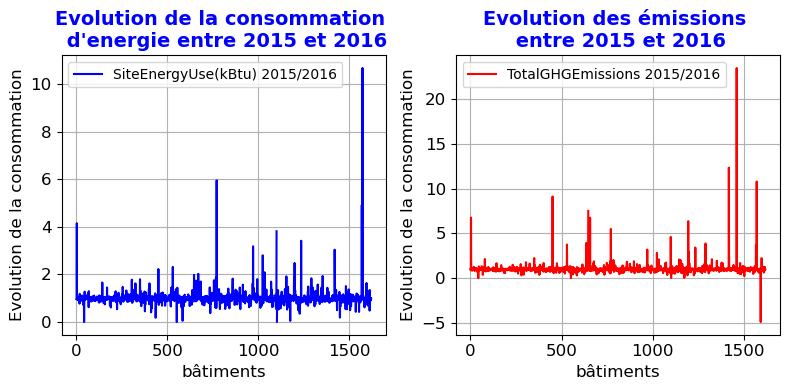

In [43]:
data_year = data_clean_obj[['OSEBuildingID','DataYear','SiteEnergyUse(kBtu)','TotalGHGEmissions','LargestPropertyUseTypeGFA']]
data_year_2015 = data_year[data_year['DataYear']== 2015].sort_values(by = 'OSEBuildingID')
data_year_2016 = data_year[data_year['DataYear']== 2016].sort_values(by = 'OSEBuildingID')
data_concat = pd.merge(data_year_2015,data_year_2016,how='inner', on ='OSEBuildingID')
data_concat.reset_index(drop=True,inplace=True)
y_siteEnergy = data_concat['SiteEnergyUse(kBtu)_x']/data_concat['SiteEnergyUse(kBtu)_y'] 
y_emission = data_concat['TotalGHGEmissions_x']/data_concat['TotalGHGEmissions_y'] 


fig=plt.figure(figsize=(8,4))
axes = fig.add_subplot(1,2,1)
axes.grid(True)
axes.plot(data_concat.index,y_siteEnergy,color='blue',label="SiteEnergyUse(kBtu) 2015/2016")
config_plt(ax = axes ,title = "Evolution de la consommation \n d'energie entre 2015 et 2016", 
           X_name = "bâtiments" , Y_name =  "Evolution de la consommation" )

axes1 = fig.add_subplot(1,2,2)
axes1.grid(True)
axes1.plot(data_concat.index,y_emission ,color="red",label="TotalGHGEmissions 2015/2016")
config_plt(ax = axes1 ,title = "Evolution des émissions \n entre 2015 et 2016", 
           X_name = "bâtiments" , Y_name =  "Evolution de la consommation" )
fig.tight_layout()
plt.show()

<p STYLE="padding-left:1em;color:blue;"><b> Nous remarquons tout de même une augmentation de la consommation d'énergie et d'émission de CO2 d'une année sur l'autre.

In [44]:
data_mean = data_clean_obj.groupby('OSEBuildingID').mean()
data_mean.reset_index(inplace = True)

data_drop_duplicated = data_clean_obj.drop_duplicates(subset=['OSEBuildingID'], keep='last')
data_drop_duplicated = data_drop_duplicated.astype({'OSEBuildingID' : object}) 
data_drop_duplicated=data_drop_duplicated.select_dtypes(include='object')
data_clean_mean_year = pd.merge(data_mean,data_drop_duplicated,how='left', on ='OSEBuildingID')
display(data_clean_mean_year)
data_clean_mean_year = data_clean_mean_year[data_clean_obj.columns]
data_clean_mean_year.drop('DataYear', axis=1, inplace = True,errors='ignore')
data_clean_mean_year

OSEBuildingID  DataYear  CouncilDistrictCode  NumberofBuildings  \
0                1    2015.5                  7.0                1.0   
1                2    2015.5                  7.0                1.0   
2                3    2015.5                  7.0                1.0   
3                5    2015.5                  7.0                1.0   
4                8    2015.5                  7.0                1.0   
...            ...       ...                  ...                ...   
1693         50222    2016.0                  2.0                1.0   
1694         50223    2016.0                  2.0                1.0   
1695         50224    2016.0                  7.0                1.0   
1696         50225    2016.0                  1.0                1.0   
1697         50226    2016.0                  2.0                1.0   

      NumberofFloors  LargestPropertyUseTypeGFA  \
0               12.0                    88434.0   
1               11.0                    83880.0   
2               41.0                   756868.0   
3               10.0                    61320.0   
4               18.0                   123445.0   
...              ...                        ...   
1693             1.0                    12294.0   
1694             1.0                    16000.0   
1695             1.0                     7583.0   
1696             1.0                     6601.0   
1697             1.0                     8271.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                                 0.0                             0.0   
1                             15064.0                          4622.0   
2                             50000.0                             0.0   
3                                 0.0                             0.0   
4                             68009.0                             0.0   
...                               ...                             ...   
1693                              0.0                             0.0   
1694                              0.0                             0.0   
1695                           5574.0                             0.0   
1696                           6501.0                           484.0   
1697                           8000.0                          1108.0   

      ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions   Latitude  \
0                62.5         7.103895e+06            249.705  47.612195   
1                56.0         8.371084e+06            279.685  47.613138   
2                30.5         7.285884e+07           2075.380  47.613639   
3                28.5         1.751195e+07           1111.385  47.614168   
4                71.0         1.450085e+07            506.355  47.613752   
...               ...                  ...                ...        ...   
1693             46.0         8.497457e+05             20.940  47.567220   
1694              NaN         9.502762e+05             32.170  47.596250   
1695              NaN         5.765898e+06            223.540  47.636440   
1696              NaN         7.194712e+05             22.110  47.528320   
1697              NaN         1.152896e+06             41.270  47.539390   

       Longitude  BuildingAge  SourceEnergyProduct(kBtu)        BuildingType  \
0    -122.337994         89.0               1.574709e+07      NonResidential   
1    -122.333644         20.0               1.625555e+07      NonResidential   
2    -122.337900         47.0               1.833196e+08      NonResidential   
3    -122.336624         90.0               2.613631e+07      NonResidential   
4    -122.340697         36.0               2.717447e+07      NonResidential   
...          ...          ...                        ...                 ...   
1693 -122.311540         26.0               1.988479e+06  Nonresidential COS   
1694 -122.322830         12.0               1.826962e+06  Nonresidential COS   
1695 -122.357840 

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                1      NonResidential               Hotel   
1                2      NonResidential               Hotel   
2                3      NonResidential               Hotel   
3                5      NonResidential               Hotel   
4                8      NonResidential               Hotel   
...            ...                 ...                 ...   
1693         50222  Nonresidential COS              Office   
1694         50223  Nonresidential COS               Other   
1695         50224  Nonresidential COS               Other   
1696         50225  Nonresidential COS  Mixed Use Property   
1697         50226  Nonresidential COS  Mixed Use Property   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                  7.0   
1                       0659000220                  7.0   
2                       0659000475                  7.0   
3                       0659000640                  7.0   
4                       0659000970                  7.0   
...                            ...                  ...   
1693                    1624049080                  2.0   
1694                    3558300000                  2.0   
1695                    1794501150                  7.0   
1696                    7883603155                  1.0   
1697                    7857002030                  2.0   

               Neighborhood  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN                1.0            12.0   
1                  DOWNTOWN                1.0            11.0   
2                  DOWNTOWN                1.0            41.0   
3                  DOWNTOWN                1.0            10.0   
4                  DOWNTOWN                1.0            18.0   
...                     ...                ...             ...   
1693       GREATER DUWAMISH                1.0             1.0   
1694               DOWNTOWN                1.0             1.0   
1695  MAGNOLIA / QUEEN ANNE                1.0             1.0   
1696       GREATER DUWAMISH                1.0             1.0   
1697       GREATER DUWAMISH                1.0             1.0   

                                                                         ListOfAllPropertyUseTypes  \
0                                                                                            Hotel   
1                                                                       Hotel, Parking, Restaurant   
2                                                                                            Hotel   
3                                                                                            Hotel   
4                                                                    Hotel, Parking, Swimming Pool   
...                                                                                            ...   
1693                                                                                        Office   
1694                                                                            Other - Recreation   
1695                             Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool   
1696  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   
1697  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756868.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
1693                 Office                    12294.0   
1694     Other - Recreation                    16000.0   
1695     Ot

In [45]:
data_clean_mean_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1698 entries, 0 to 1697
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1698 non-null   object 
 1   BuildingType                     1698 non-null   object 
 2   PrimaryPropertyType              1698 non-null   object 
 3   TaxParcelIdentificationNumber    1698 non-null   object 
 4   CouncilDistrictCode              1698 non-null   float64
 5   Neighborhood                     1698 non-null   object 
 6   NumberofBuildings                1698 non-null   float64
 7   NumberofFloors                   1698 non-null   float64
 8   ListOfAllPropertyUseTypes        1690 non-null   object 
 9   LargestPropertyUseType           1686 non-null   object 
 10  LargestPropertyUseTypeGFA        1686 non-null   float64
 11  SecondLargestPropertyUseType     1698 non-null   object 
 12  SecondLargestPropert

### <a STYLE="color:black;padding-left:1em" id="3.4.5">3.4.5 Nettoyage du jeu de données
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Conversion de la variable  
<span STYLE="color:gray;" ><i> 'TaxParcelIdentificationNumber' </i></span> en numérique

In [46]:
erreur = []
for i in data_clean_mean_year['TaxParcelIdentificationNumber'] :
    try : 
        int(i) 
    except :
        erreur.append(i)
print(erreur)
data_clean_mean_year[ (data_clean_mean_year['TaxParcelIdentificationNumber'] == erreur[0]) | 
                     (data_clean_mean_year['TaxParcelIdentificationNumber'] == erreur[1]) | 
                    (data_clean_mean_year['TaxParcelIdentificationNumber'] == '6850700316' ) |
                    (data_clean_mean_year['TaxParcelIdentificationNumber'] == '6850700315' ) |
                    (data_clean_mean_year['TaxParcelIdentificationNumber'] == '701100-0000') ] 

['6850700316 and 6850700315', '701100-0000']


OSEBuildingID    BuildingType          PrimaryPropertyType  \
1593         34908  NonResidential  Supermarket / Grocery Store   
1606         40348  NonResidential           Mixed Use Property   
1627         49737  NonResidential                 Retail Store   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
1593                    6850700315                  3.0   
1606     6850700316 and 6850700315                  3.0   
1627                   701100-0000                  7.0   

               Neighborhood  NumberofBuildings  NumberofFloors  \
1593                   EAST                1.0             2.0   
1606                   EAST                1.0             2.0   
1627  MAGNOLIA / QUEEN ANNE                1.0             3.0   

                                                                                                        ListOfAllPropertyUseTypes  \
1593                                                                                                    Supermarket/Grocery Store   
1606  Multifamily Housing, Parking, Personal Services (Health/Beauty, Dry Cleaning, etc), Retail Store, Supermarket/Grocery Store   
1627                                                                                                 Hotel, Parking, Retail Store   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
1593  Supermarket/Grocery Store                    66497.0   
1606                    Parking                   123715.0   
1627               Retail Store                    24588.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
1593               No information                              0.0   
1606    Supermarket/Grocery Store                          32000.0   
1627                        Hotel                          17558.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
1593              No information                             0.0   
1606         Multifamily Housing                         20507.0   
1627                     Parking                          1686.0   

      ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions   Latitude  \
1593             87.5            8950546.0             70.845  47.622565   
1606             30.0            8174458.0             67.795  47.622338   
1627             67.0            3782742.0            136.400  47.625015   

       Longitude ElectricityUse NaturalGasUse SteamUseUse  BuildingAge  \
1593 -122.321204              1             1           0         66.0   
1606 -122.320959              1             1           0        100.0   
1627 -122.356349              1             1           0         98.0   

      SourceEnergyProduct(kBtu)  
1593               2.771943e+07  
1606               2.518006e+07  
1627               6.895311e+06

In [47]:
data_clean_mean_year['TaxParcelIdentificationNumber'].replace('701100-0000','7011000000', inplace = True)
data_clean_mean_year['TaxParcelIdentificationNumber'].replace('6850700316 and 6850700315','6850700316', inplace = True)
data_clean_mean_year['TaxParcelIdentificationNumber']=data_clean_mean_year['TaxParcelIdentificationNumber'].astype('int64')

In [48]:
data_clean_mean_year.dropna(subset=['SiteEnergyUse(kBtu)','LargestPropertyUseType'], axis=0, inplace = True )
data_clean_mean_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1697
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1685 non-null   object 
 1   BuildingType                     1685 non-null   object 
 2   PrimaryPropertyType              1685 non-null   object 
 3   TaxParcelIdentificationNumber    1685 non-null   int64  
 4   CouncilDistrictCode              1685 non-null   float64
 5   Neighborhood                     1685 non-null   object 
 6   NumberofBuildings                1685 non-null   float64
 7   NumberofFloors                   1685 non-null   float64
 8   ListOfAllPropertyUseTypes        1685 non-null   object 
 9   LargestPropertyUseType           1685 non-null   object 
 10  LargestPropertyUseTypeGFA        1685 non-null   float64
 11  SecondLargestPropertyUseType     1685 non-null   object 
 12  SecondLargestPropert

In [49]:
data_clean_mean_year['Total_Surface_PropertyUse'] = data_clean_mean_year[['LargestPropertyUseTypeGFA',
                                                                 'SecondLargestPropertyUseTypeGFA',
                                                                 'ThirdLargestPropertyUseTypeGFA']].sum(axis=1)

In [50]:
def split_words(DF, column = None):
    list_words = set()
    for word in DF[column].str.split(','):
        for w in word:
            list_words.add(w)
    print(len(list_words))
    return list_words
split_words(data_clean_mean_year,'ListOfAllPropertyUseTypes')

116


{' Bank Branch',
 ' Bar/Nightclub',
 ' Data Center',
 ' Distribution Center',
 ' Dry Cleaning',
 ' Financial Office',
 ' Fitness Center/Health Club/Gym',
 ' Food Sales',
 ' Food Service',
 ' Hotel',
 ' Laboratory',
 ' Library',
 ' Locksmith',
 ' Manufacturing/Industrial Plant',
 ' Medical Office',
 ' Movie Theater',
 ' Multifamily Housing',
 ' Museum',
 ' Non-Refrigerated Warehouse',
 ' Office',
 ' Other',
 ' Other - Education',
 ' Other - Entertainment/Public Assembly',
 ' Other - Lodging/Residential',
 ' Other - Mall',
 ' Other - Public Services',
 ' Other - Recreation',
 ' Other - Restaurant/Bar',
 ' Other - Services',
 ' Other - Technology/Science',
 ' Other - Utility',
 ' Other/Specialty Hospital',
 ' Outpatient Rehabilitation/Physical Therapy',
 ' Parking',
 ' Performing Arts',
 ' Personal Services (Health/Beauty',
 ' Pre-school/Daycare',
 ' Refrigerated Warehouse',
 ' Repair Services (Vehicle',
 ' Residence Hall/Dormitory',
 ' Restaurant',
 ' Retail Store',
 ' Self-Storage Facil

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Regroupement des données des variables   
<span STYLE="color:gray;" ><i> 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'</i></span> en catégorie d'usage

In [51]:
print(data_clean_mean_year.nunique())
display(data_clean_mean_year['PrimaryPropertyType'].unique())
display(data_clean_mean_year['LargestPropertyUseType'].unique())
display(data_clean_mean_year['SecondLargestPropertyUseType'].unique())
display(data_clean_mean_year['ThirdLargestPropertyUseType'].unique())

OSEBuildingID                      1685
BuildingType                          5
PrimaryPropertyType                  23
TaxParcelIdentificationNumber      1603
CouncilDistrictCode                   8
Neighborhood                         13
NumberofBuildings                    20
NumberofFloors                       45
ListOfAllPropertyUseTypes           377
LargestPropertyUseType               57
LargestPropertyUseTypeGFA          1584
SecondLargestPropertyUseType         48
SecondLargestPropertyUseTypeGFA     712
ThirdLargestPropertyUseType          40
ThirdLargestPropertyUseTypeGFA      311
ENERGYSTARScore                     193
SiteEnergyUse(kBtu)                1685
TotalGHGEmissions                  1666
Latitude                           1645
Longitude                          1644
ElectricityUse                        2
NaturalGasUse                         2
SteamUseUse                           2
BuildingAge                         113
SourceEnergyProduct(kBtu)          1684


array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Low-Rise Multifamily', 'Restaurant',
       'Non-Refrigerated Warehouse', 'Office'], dtype=object)

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indu

array(['No information', 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health 

array(['No information', 'Restaurant', 'Swimming Pool', 'Data Center',
       'Office', 'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Food Service', 'Other - Services', 'Medical Office', 'Parking',
       'Other - Utility', 'K-12 School', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Pre-school/Daycare',
       'Convenience Store without Gas Station', 'Financial Office',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Bar/Nightclub', 'Manufacturing/Industrial Plant',
       'Other/Specialty Hospital', 'Fast Food Restaurant',
       'Worship Facility', 'Supermarket/Grocery Store', 'Strip Mall',
       'Vocational School'], d

In [52]:
def cols_cat(DF, cols):
    list_word = []
    for word in DF[cols]:
        word = pd.Series(word)
        education = word.str.contains('Education|school|K-12|College|University', case=False)
        retail = word.str.contains('mall|store|retail|Supermarket|Repair Services|Personal Services|Automobile|Supercenter', case=False)
        hobbies = word.str.contains('Swimming|Restaurant|bar|museum|theater|movie|Recreation|Entertainment|Worship|library|Performing Arts|Fitness|food|lifestyle', case=False)
        office = word.str.contains('bank|office|laboratory|Public Services|Other - Services', case=False)
        health = word.str.contains('hospital|clinic|Therapy', case=False)
        public_building =word.str.contains('fire|police|prison|Courthouse', case=False) 
        hotel_housing= word.str.contains('hotel|housing|residen|Convention Center|Meeting|community', case=False) 
        distribution_warehouse = word.str.contains('distribution|Non-Refrigerated|storage', case=False) 
        other = word.str.contains('other', case=False)

        if education[0]:
            list_word.append('Education')
        elif retail[0]:
            list_word.append('Retail')
        elif hobbies[0]:
            list_word.append('Hobbies')
        elif health[0]:
            list_word.append('Health')
        elif office[0]:
            list_word.append('Office')
        elif public_building[0]:
            list_word.append('Public_building')
        elif hotel_housing[0]:
            list_word.append('Hotel/housing')
        elif distribution_warehouse[0]:
            list_word.append('Distribution/warehouse')
        elif other[0]:
            list_word.append('Other')
        else : 
            list_word.append(word[0])

    print(len(set(list_word)))
    return set(list_word)

print(cols_cat(data_clean_mean_year,'LargestPropertyUseType'))
print(cols_cat(data_clean_mean_year,'SecondLargestPropertyUseType'))
print(cols_cat(data_clean_mean_year,'ThirdLargestPropertyUseType'))

13
{'Distribution/warehouse', 'Education', 'Office', 'Manufacturing/Industrial Plant', 'Public_building', 'Refrigerated Warehouse', 'Retail', 'Health', 'Hotel/housing', 'Data Center', 'Other', 'Hobbies', 'Parking'}
14
{'Distribution/warehouse', 'Office', 'Education', 'Manufacturing/Industrial Plant', 'Data Center', 'Public_building', 'Refrigerated Warehouse', 'Retail', 'Health', 'Hotel/housing', 'No information', 'Other', 'Hobbies', 'Parking'}
13
{'Distribution/warehouse', 'Office', 'Education', 'Manufacturing/Industrial Plant', 'Data Center', 'Refrigerated Warehouse', 'Retail', 'Health', 'Hotel/housing', 'No information', 'Other', 'Hobbies', 'Parking'}


In [53]:
def convert_cols_cat(word):
    word = pd.Series(word)
    education = word.str.contains('Education|school|K-12|College|University', case=False)
    retail = word.str.contains('mall|store|retail|Supermarket|Repair Services|Personal Services|Automobile|Supercenter', case=False)
    hobbies = word.str.contains('Swimming|Restaurant|bar|museum|theater|movie|Recreation|Entertainment|Worship|library|Performing Arts|Fitness|food|lifestyle', case=False)
    office = word.str.contains('bank|office|laboratory|Public Services|Other - Services', case=False)
    health = word.str.contains('hospital|clinic|Therapy', case=False)
    public_building =word.str.contains('fire|police|prison|Courthouse', case=False) 
    hotel_housing= word.str.contains('hotel|housing|residen|Convention Center|Meeting|community', case=False) 
    distribution_warehouse = word.str.contains('distribution|Non-Refrigerated|storage', case=False) 
    other = word.str.contains('other', case=False)

    if education[0]:
        word = 'Education'
    elif retail[0]:
        word = 'Retail'
    elif hobbies[0]:
        word = 'Hobbies'
    elif health[0]:
        word = 'Health'
    elif office[0]:
        word = 'Office'
    elif public_building[0]:
        word = 'public_building'
    elif hotel_housing[0]:
        word = 'hotel/housing'
    elif distribution_warehouse[0]:
        word = 'distribution/warehouse'
    elif other[0]:
        word = 'other'
    else : 
        word = word[0]
            
    return word

data_clean_mean_year['Cat_LargestPropertyUseType'] = data_clean_mean_year['LargestPropertyUseType'].apply(convert_cols_cat)
data_clean_mean_year['Cat_SecondLargestPropertyUseType'] = data_clean_mean_year['SecondLargestPropertyUseType'].apply(convert_cols_cat)
data_clean_mean_year['Cat_ThirdLargestPropertyUseType'] = data_clean_mean_year['ThirdLargestPropertyUseType'].apply(convert_cols_cat)
display(data_clean_mean_year.describe())
display(data_clean_mean_year.info())

TaxParcelIdentificationNumber  CouncilDistrictCode  NumberofBuildings  \
count                   1.685000e+03          1685.000000        1685.000000   
mean                    4.037125e+09             4.365579           1.149555   
std                     2.768230e+09             2.192124           2.820944   
min                     0.000000e+00             1.000000           0.500000   
25%                     1.972207e+09             2.000000           1.000000   
50%                     2.926049e+09             4.000000           1.000000   
75%                     7.132800e+09             7.000000           1.000000   
max                     9.834202e+09             7.000000         111.000000   

       NumberofFloors  LargestPropertyUseTypeGFA  \
count     1685.000000               1.685000e+03   
mean         4.112166               9.886330e+04   
std          6.538657               2.758224e+05   
min          0.000000               6.455000e+03   
25%          1.000000               2.548000e+04   
50%          2.000000               4.347300e+04   
75%          4.000000               9.193500e+04   
max         99.000000               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1685.000000                     1685.000000   
mean                      18515.910771                     3025.148249   
std                       52406.441912                    17615.671879   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       12827.500000                        0.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions     Latitude  \
count      1148.000000         1.685000e+03        1685.000000  1685.000000   
mean         64.945122         8.499624e+06         186.301777    47.616113   
std          28.003628         3.020584e+07         748.074089     0.048137   
min           1.000000         0.000000e+00           0.120000    47.499250   
25%          46.500000         1.230588e+06          20.255000    47.585879   
50%          72.500000         2.556121e+06          50.500000    47.612443   
75%          88.000000         6.992067e+06         141.055000    47.649306   
max         100.000000         8.739237e+08       16870.980000    47.733840   

         Longitude  BuildingAge  SourceEnergyProduct(kBtu)  \
count  1685.000000  1685.000000               1.684000e+03   
mean   -122.332905    54.145401               2.141803e+07   
std       0.024539    32.822594               7.479338e+07   
min    -122.411741     1.000000               1.961533e+02   
25%    -122.343284    27.000000               2.991950e+06   
50%    -122.332898    51.000000               6.149034e+06   
75%    -122.321636    86.000000               1.800118e+07   
max    -122.258729   116.000000               2.297544e+09   

       Total_Surface_PropertyUse  
count               1.685000e+03  
mean                1.204044e+05  
std                 3.048536e+05  
min                 8.223000e+03  
25%                 2.940300e+04  
50%                 4.991200e+04  
75%                 1.030000e+05  
max                 9.320156e+06

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1697
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OSEBuildingID                     1685 non-null   object 
 1   BuildingType                      1685 non-null   object 
 2   PrimaryPropertyType               1685 non-null   object 
 3   TaxParcelIdentificationNumber     1685 non-null   int64  
 4   CouncilDistrictCode               1685 non-null   float64
 5   Neighborhood                      1685 non-null   object 
 6   NumberofBuildings                 1685 non-null   float64
 7   NumberofFloors                    1685 non-null   float64
 8   ListOfAllPropertyUseTypes         1685 non-null   object 
 9   LargestPropertyUseType            1685 non-null   object 
 10  LargestPropertyUseTypeGFA         1685 non-null   float64
 11  SecondLargestPropertyUseType      1685 non-null   object 
 12  Second

None

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Suppression de données non pertinentes pour l'étude   
<span STYLE="color:gray;" ><i> 'SiteEnergyUse(kBtu)'= 0 </i></span> ( problème pour la mise en échelle log)

In [54]:
data_clean_mean_year.drop(data_clean_mean_year[data_clean_mean_year['SiteEnergyUse(kBtu)']==0].index,inplace=True,axis=0, errors ='ignore') 
display(data_clean_mean_year.describe())
print(data_clean_mean_year.info())

TaxParcelIdentificationNumber  CouncilDistrictCode  NumberofBuildings  \
count                   1.684000e+03          1684.000000        1684.000000   
mean                    4.038027e+09             4.367577           1.149644   
std                     2.768805e+09             2.191239           2.821780   
min                     0.000000e+00             1.000000           0.500000   
25%                     1.972207e+09             2.000000           1.000000   
50%                     2.926049e+09             4.000000           1.000000   
75%                     7.133050e+09             7.000000           1.000000   
max                     9.834202e+09             7.000000         111.000000   

       NumberofFloors  LargestPropertyUseTypeGFA  \
count     1684.000000               1.684000e+03   
mean         4.113420               9.888670e+04   
std          6.540397               2.759026e+05   
min          0.000000               6.455000e+03   
25%          1.000000               2.547250e+04   
50%          2.000000               4.346250e+04   
75%          4.000000               9.195275e+04   
max         99.000000               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1684.000000                     1684.000000   
mean                      18526.905967                     3026.944655   
std                       52420.064810                    17620.750129   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       12839.625000                        0.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions     Latitude  \
count      1148.000000         1.684000e+03        1684.000000  1684.000000   
mean         64.945122         8.504671e+06         186.409920    47.616177   
std          28.003628         3.021410e+07         748.283125     0.048081   
min           1.000000         1.697945e+04           0.120000    47.499250   
25%          46.500000         1.230996e+06          20.311250    47.585892   
50%          72.500000         2.557883e+06          50.540000    47.612456   
75%          88.000000         7.000638e+06         141.133750    47.649315   
max         100.000000         8.739237e+08       16870.980000    47.733840   

         Longitude  BuildingAge  SourceEnergyProduct(kBtu)  \
count  1684.000000  1684.000000               1.684000e+03   
mean   -122.332878    54.137173               2.141803e+07   
std       0.024521    32.830606               7.479338e+07   
min    -122.411741     1.000000               1.961533e+02   
25%    -122.343284    27.000000               2.991950e+06   
50%    -122.332855    51.000000               6.149034e+06   
75%    -122.321622    86.000000               1.800118e+07   
max    -122.258729   116.000000               2.297544e+09   

       Total_Surface_PropertyUse  
count               1.684000e+03  
mean                1.204405e+05  
std                 3.049406e+05  
min                 8.223000e+03  
25%                 2.939725e+04  
50%                 4.987950e+04  
75%                 1.030000e+05  
max                 9.320156e+06

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1697
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OSEBuildingID                     1684 non-null   object 
 1   BuildingType                      1684 non-null   object 
 2   PrimaryPropertyType               1684 non-null   object 
 3   TaxParcelIdentificationNumber     1684 non-null   int64  
 4   CouncilDistrictCode               1684 non-null   float64
 5   Neighborhood                      1684 non-null   object 
 6   NumberofBuildings                 1684 non-null   float64
 7   NumberofFloors                    1684 non-null   float64
 8   ListOfAllPropertyUseTypes         1684 non-null   object 
 9   LargestPropertyUseType            1684 non-null   object 
 10  LargestPropertyUseTypeGFA         1684 non-null   float64
 11  SecondLargestPropertyUseType      1684 non-null   object 
 12  Second

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Correction du nombre de bâtiments (nombre à virgule) et du nombre d'étage (égal à 0)   

In [55]:
display(np.sort(data_clean_mean_year['NumberofBuildings'].unique()))
display(data_clean_mean_year[((data_clean_mean_year['NumberofBuildings']%1==0.5))])
data_clean_mean_year['NumberofBuildings']=data_clean_mean_year['NumberofBuildings']+data_clean_mean_year['NumberofBuildings']%1

array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   6. ,   7. ,   7.5,  10. ,  11. ,  12. ,  14. ,  15. ,
        20. , 111. ])

OSEBuildingID        BuildingType          PrimaryPropertyType  \
62              89      NonResidential               Medical Office   
75             113      NonResidential  Small- and Mid-Sized Office   
79             117      NonResidential                        Hotel   
97             147      NonResidential                     Hospital   
122            198      NonResidential                     Hospital   
...            ...                 ...                          ...   
1619         49705  Nonresidential COS                        Other   
1624         49718  Nonresidential COS                        Other   
1633         49783      NonResidential                   Laboratory   
1642         49862  Nonresidential COS                        Other   
1649         49924      NonResidential  Small- and Mid-Sized Office   

      TaxParcelIdentificationNumber  CouncilDistrictCode  \
62                       1978201270                  3.0   
75                       1988200705                  7.0   
79                       1142001871                  4.0   
97                       2767703875                  6.0   
122                      2982800005                  4.0   
...                             ...                  ...   
1619                      225049062                  4.0   
1624                     2924049006                  1.0   
1633                     1988201435                  7.0   
1642                     1985200130                  7.0   
1649                     7502500010                  3.0   

               Neighborhood  NumberofBuildings  NumberofFloors  \
62                     EAST                0.5             3.0   
75    MAGNOLIA / QUEEN ANNE                0.5             2.0   
79                NORTHEAST                1.5             4.0   
97                  BALLARD                2.5             5.0   
122               NORTHEAST                3.5            10.0   
...                     ...                ...             ...   
1619              NORTHEAST                7.5             0.0   
1624       GREATER DUWAMISH                1.5             2.0   
1633             LAKE UNION                0.5             8.0   
1642  MAGNOLIA / QUEEN ANNE                0.5             1.0   
1649                   EAST                0.5             2.0   

                                            ListOfAllPropertyUseTypes  \
62                                                     Medical Office   
75    Data Center, Distribution Center, Office, Parking, Retail Store   
79                                               Hotel, Swimming Pool   
97                     Hospital (General Medical & Surgical), Parking   
122                             Hospital (General Medical & Surgical)   
...                                                               ...   
1619                                               Other - Recreation   
1624                                                  Other - Utility   
1633       Convenience Store without Gas Station, Laboratory, Parking   
1642                                                            Other   
1649                         Movie Theater, Office, Vocational School   

                     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
62                           Medical Office                   179014.0   
75                                   Office                    45900.0   
79                                    Hotel                    50017.0   
97    Hospital (General Medical & Surgical)                   302661.0   
122   Hospital (General Medical & Surgical)                   879000.0   
...                                     ...                        ...   
1619                     Other - Recreation                   564258.0   
1624                        Other - Utility                   138602.0   
1633                             Laboratory                   189280.5   
1642                 

In [56]:
display(np.sort(data_clean_mean_year['NumberofFloors'].unique()))
display(data_clean_mean_year[data_clean_mean_year['NumberofFloors']<1])
data_clean_mean_year['NumberofFloors'].replace(0, 1,inplace=True)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       27., 28., 29., 30., 33., 34., 36., 37., 39., 41., 42., 46., 47.,
       49., 55., 56., 63., 76., 99.])

OSEBuildingID        BuildingType          PrimaryPropertyType  \
163            267      NonResidential                        Hotel   
483            656      NonResidential               Medical Office   
484            657      NonResidential           Mixed Use Property   
557            758      NonResidential                        Other   
1095         23311      NonResidential               Medical Office   
1183         24086              Campus                        Other   
1602         40028      NonResidential                    Warehouse   
1603         40031      NonResidential               Medical Office   
1604         40034      NonResidential  Small- and Mid-Sized Office   
1619         49705  Nonresidential COS                        Other   
1656         49966      NonResidential                        Other   
1657         49967              Campus                   University   
1659         49970      NonResidential               Residence Hall   
1661         49979      NonResidential               Residence Hall   
1662         49980      NonResidential               Residence Hall   
1663         49983      NonResidential               Residence Hall   

      TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
163                      6792120000                  7.0          DOWNTOWN   
483                      8725990000                  3.0              EAST   
484                      8729740000                  7.0          DOWNTOWN   
557                      6600470000                  7.0          DOWNTOWN   
1095                     8590900646                  3.0              EAST   
1183                     7666203387                  2.0  GREATER DUWAMISH   
1602                      225049077                  4.0         NORTHEAST   
1603                      225049077                  4.0         NORTHEAST   
1604                      225049077                  4.0         NORTHEAST   
1619                      225049062                  4.0         NORTHEAST   
1656                     6056110050                  2.0         SOUTHEAST   
1657                     1625049001                  4.0         NORTHEAST   
1659                     1625049001                  4.0         NORTHEAST   
1661                     1625049001                  4.0         NORTHEAST   
1662                     1625049001                  4.0         NORTHEAST   
1663                     1625049001                  4.0         NORTHEAST   

      NumberofBuildings  NumberofFloors  \
163                 1.0             0.0   
483                 1.0             0.0   
484                 1.0             0.0   
557                 1.0             0.0   
1095                1.0             0.0   
1183               10.0             0.0   
1602                1.0             0.0   
1603                1.0             0.0   
1604                1.0             0.0   
1619                8.0             0.0   
1656                1.0             0.0   
1657              111.0             0.0   
1659                1.0             0.0   
1661                1.0             0.0   
1662                1.0             0.0   
1663                1.0             0.0   

                                                                                ListOfAllPropertyUseTypes  \
163                                                       Hotel, Other, Parking, Restaurant, Retail Store   
483                                                                                        Medical Office   
484   Financial Office, Hotel, Multifamily Housing, Other, Parking, Restaurant, Supermarket/Grocery Store   
557                               Office, Other - Entertainment/Public Assembly, Other - Mall, Restaurant   
1095                                                                              Medical Office, Parking   
1183                                                                                

In [57]:
data_clean_mean_year.describe()

TaxParcelIdentificationNumber  CouncilDistrictCode  NumberofBuildings  \
count                   1.684000e+03          1684.000000        1684.000000   
mean                    4.038027e+09             4.367577           1.171615   
std                     2.768805e+09             2.191239           2.823318   
min                     0.000000e+00             1.000000           1.000000   
25%                     1.972207e+09             2.000000           1.000000   
50%                     2.926049e+09             4.000000           1.000000   
75%                     7.133050e+09             7.000000           1.000000   
max                     9.834202e+09             7.000000         111.000000   

       NumberofFloors  LargestPropertyUseTypeGFA  \
count     1684.000000               1.684000e+03   
mean         4.122922               9.888670e+04   
std          6.535135               2.759026e+05   
min          1.000000               6.455000e+03   
25%          1.000000               2.547250e+04   
50%          2.000000               4.346250e+04   
75%          4.000000               9.195275e+04   
max         99.000000               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1684.000000                     1684.000000   
mean                      18526.905967                     3026.944655   
std                       52420.064810                    17620.750129   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       12839.625000                        0.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions     Latitude  \
count      1148.000000         1.684000e+03        1684.000000  1684.000000   
mean         64.945122         8.504671e+06         186.409920    47.616177   
std          28.003628         3.021410e+07         748.283125     0.048081   
min           1.000000         1.697945e+04           0.120000    47.499250   
25%          46.500000         1.230996e+06          20.311250    47.585892   
50%          72.500000         2.557883e+06          50.540000    47.612456   
75%          88.000000         7.000638e+06         141.133750    47.649315   
max         100.000000         8.739237e+08       16870.980000    47.733840   

         Longitude  BuildingAge  SourceEnergyProduct(kBtu)  \
count  1684.000000  1684.000000               1.684000e+03   
mean   -122.332878    54.137173               2.141803e+07   
std       0.024521    32.830606               7.479338e+07   
min    -122.411741     1.000000               1.961533e+02   
25%    -122.343284    27.000000               2.991950e+06   
50%    -122.332855    51.000000               6.149034e+06   
75%    -122.321622    86.000000               1.800118e+07   
max    -122.258729   116.000000               2.297544e+09   

       Total_Surface_PropertyUse  
count               1.684000e+03  
mean                1.204405e+05  
std                 3.049406e+05  
min                 8.223000e+03  
25%                 2.939725e+04  
50%                 4.987950e+04  
75%                 1.030000e+05  
max                 9.320156e+06

# <a STYLE="color:black;padding-left:0em" id="4">Etape 4 : Exploration du jeu de données
## <a STYLE="color:black;padding-left:0em" id="4.1">4.1 Analyse uni-variée des variables du  jeu de données

In [58]:
data_clean_final = data_clean_mean_year
data_clean_final.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'Latitude', 'Longitude', 'ElectricityUse', 'NaturalGasUse',
       'SteamUseUse', 'BuildingAge', 'SourceEnergyProduct(kBtu)',
       'Total_Surface_PropertyUse', 'Cat_LargestPropertyUseType',
       'Cat_SecondLargestPropertyUseType', 'Cat_ThirdLargestPropertyUseType'],
      dtype='object')

In [59]:
label = {'BuildingAge' : 'Age du bâtiment' , 'NumberofBuildings' : 'Nombre de bâtiments',
        'SiteEnergyUse(kBtu)': 'Energie utilisée (kBtu)','TotalGHGEmissions' : 'Total GHG Emissions',
        'NumberofFloors':'Nombre d\'étages','Neighborhood' : 'Quartier','BuildingType':'Type du bâtiment'}

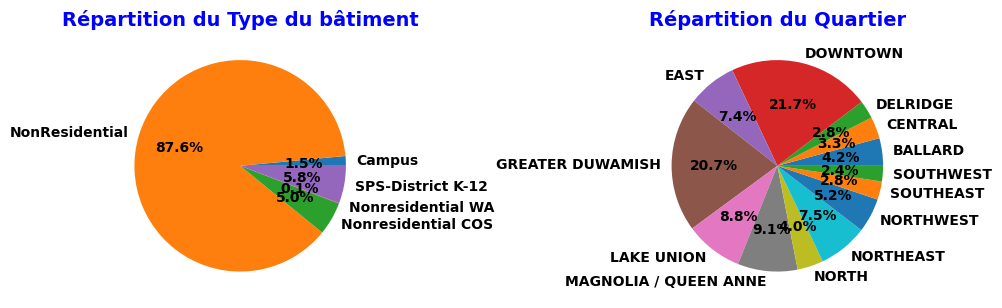

In [60]:
plot_pie(data_clean_final, ['BuildingType','Neighborhood'])

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> La majorité des bâtiments sont typés <span STYLE="color:gray;" ><i> 'NonResidential'</i></span>.    

<Figure size 1900x1200 with 0 Axes>

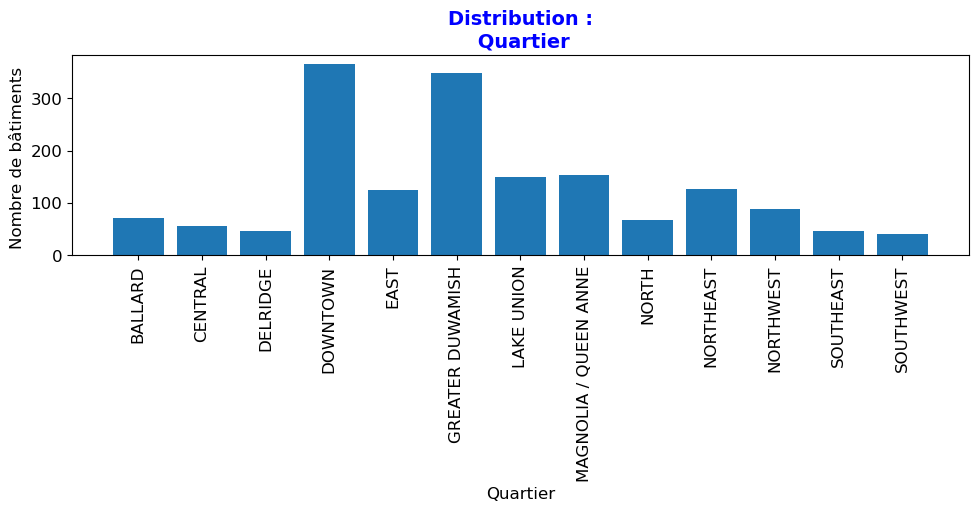

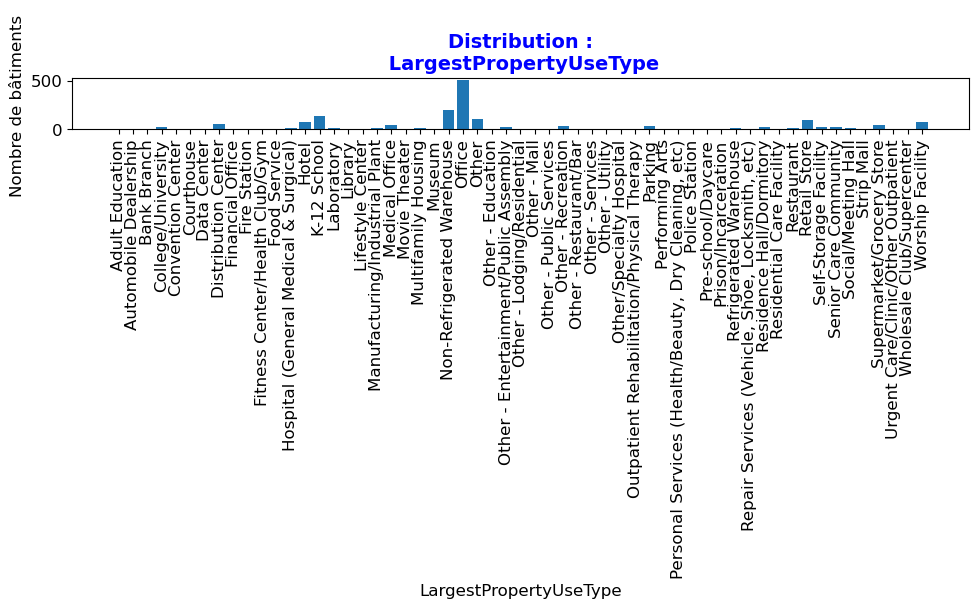

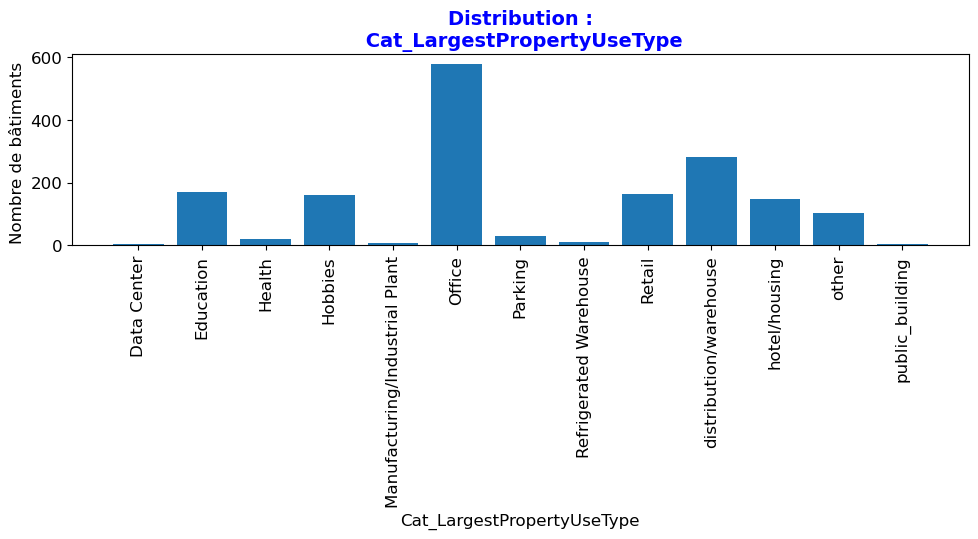

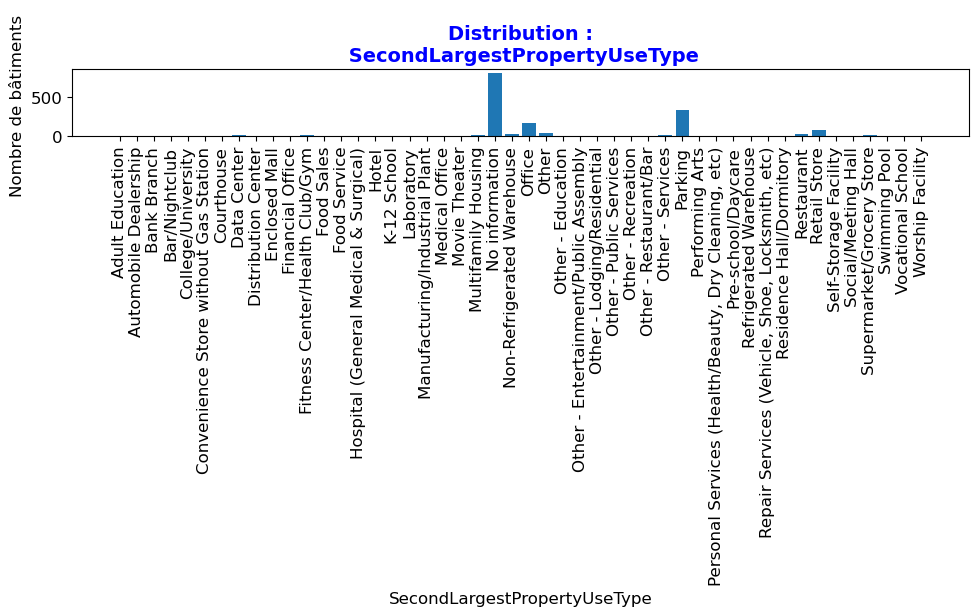

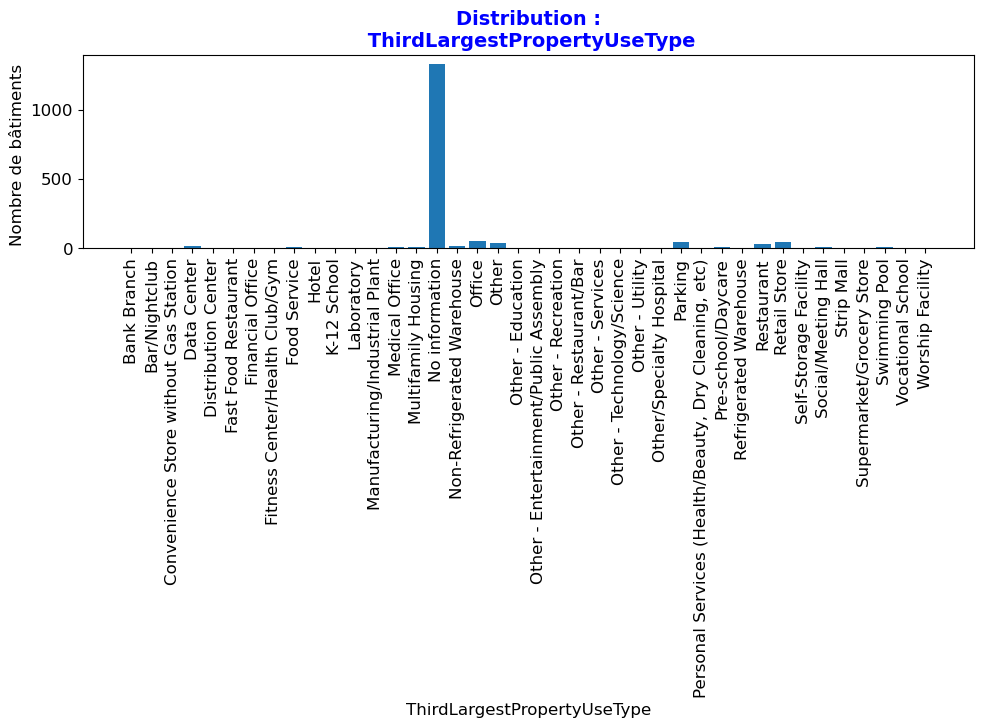

In [61]:
plot_bar(data_clean_final,['Neighborhood','LargestPropertyUseType','Cat_LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'])

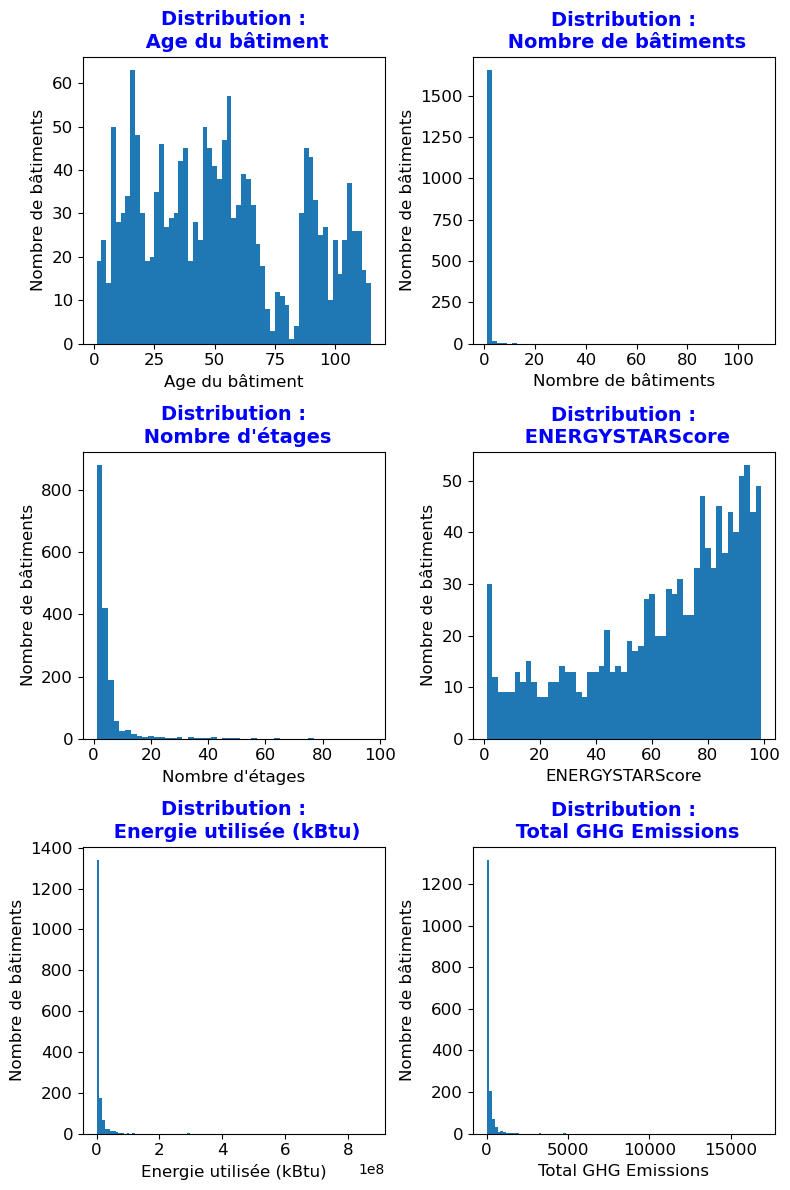

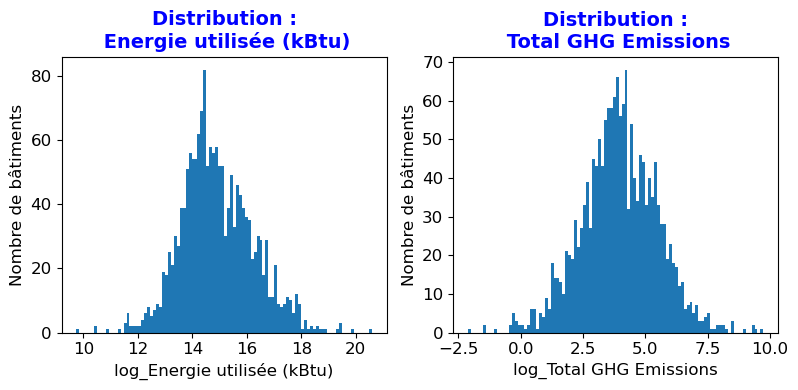

In [62]:
plot_hist(data_clean_final,['BuildingAge','NumberofBuildings', 'NumberofFloors','ENERGYSTARScore','SiteEnergyUse(kBtu)',
                                'TotalGHGEmissions'],Nb_cols = 2 , y_name = 'Nombre de bâtiments')
plot_hist(data_clean_final,['SiteEnergyUse(kBtu)','TotalGHGEmissions'],Nb_cols = 2 ,log='yes',x_name = ['log_Energie utilisée (kBtu)','log_Total GHG Emissions'], y_name ='Nombre de bâtiments')

<p STYLE="padding-left:1em;color:blue;"><b>Test de normalité des variables 
<span STYLE="color:gray;" ><i> 'SiteEnergyUse(kBtu)'et 'TotalGHGEmissions' </i></span> (avec échelle log)

In [63]:
kstest = stats.kstest(data_clean_final['SiteEnergyUse(kBtu)'],'norm')
print(kstest)
kstest = stats.kstest(data_clean_final['TotalGHGEmissions'],'norm')
print(kstest)
kstest = stats.kstest(np.log(data_clean_final['SiteEnergyUse(kBtu)']),'norm')
print(kstest)
kstest = stats.kstest(np.log(data_clean_final['TotalGHGEmissions']),'norm')
print(kstest)

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9711597046983127, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.8892853132398969, pvalue=0.0)


<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) nous indique que l'hypothèse de normalité des distributions de ces variables peuvent être rejetée.

## <a STYLE="color:black;padding-left:0em" id="4">4.2 Analyse bi-variée des variables du  jeu de données

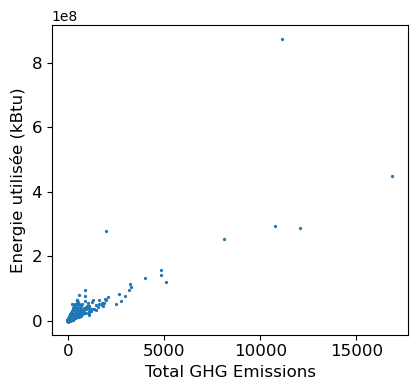

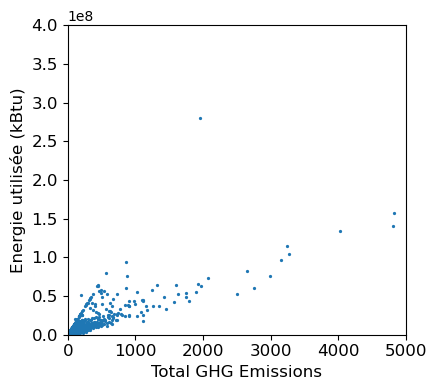

In [64]:
plot_scatter(data_clean_final,'TotalGHGEmissions','SiteEnergyUse(kBtu)')
plot_scatter(data_clean_final,'TotalGHGEmissions','SiteEnergyUse(kBtu)',x_lim=[0,5000],y_lim=[0,4e8])

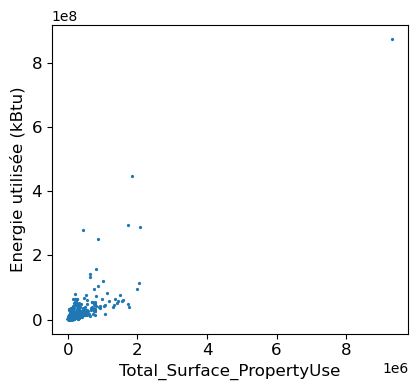

In [65]:
plot_scatter(data_clean_final,'Total_Surface_PropertyUse','SiteEnergyUse(kBtu)')

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Nous remarquons que la répartion des données d'émission de CO2 en fonction de l'énergie consommée semble suivre deux droite distinctes de régréssion linéaire.  

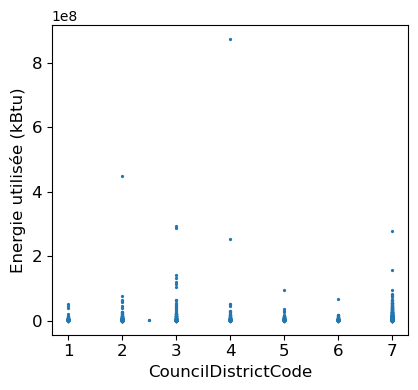

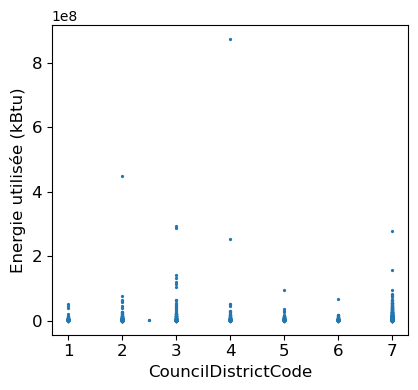

In [66]:
plot_scatter(data_clean_final,'CouncilDistrictCode','SiteEnergyUse(kBtu)')
plot_scatter(data_clean_final,'CouncilDistrictCode','SiteEnergyUse(kBtu)')

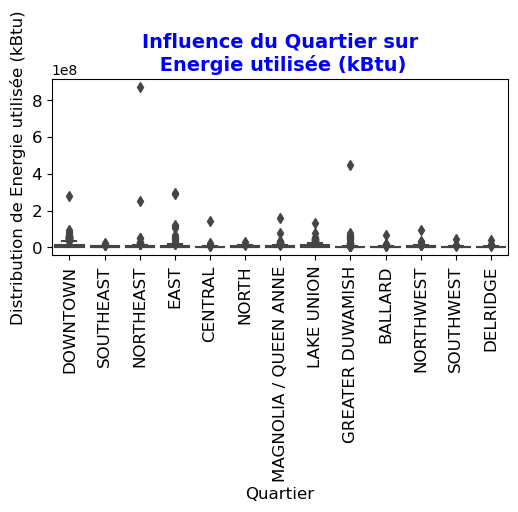

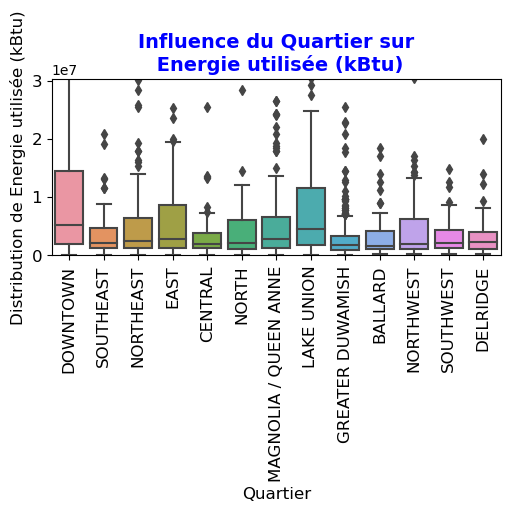

In [67]:
plot_boxplot(data_clean_mean_year, 'Neighborhood','SiteEnergyUse(kBtu)')
plot_boxplot(data_clean_mean_year, 'Neighborhood','SiteEnergyUse(kBtu)',y_lim = (0,data_clean_mean_year['SiteEnergyUse(kBtu)'].quantile(0.95)))

# <a STYLE="color:black;padding-left:0em" id="4.3">4.3 Analyse multi-variée des variables du jeu de données

Index(['NumberofBuildings', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'SourceEnergyProduct(kBtu)',
       'Total_Surface_PropertyUse'],
      dtype='object')

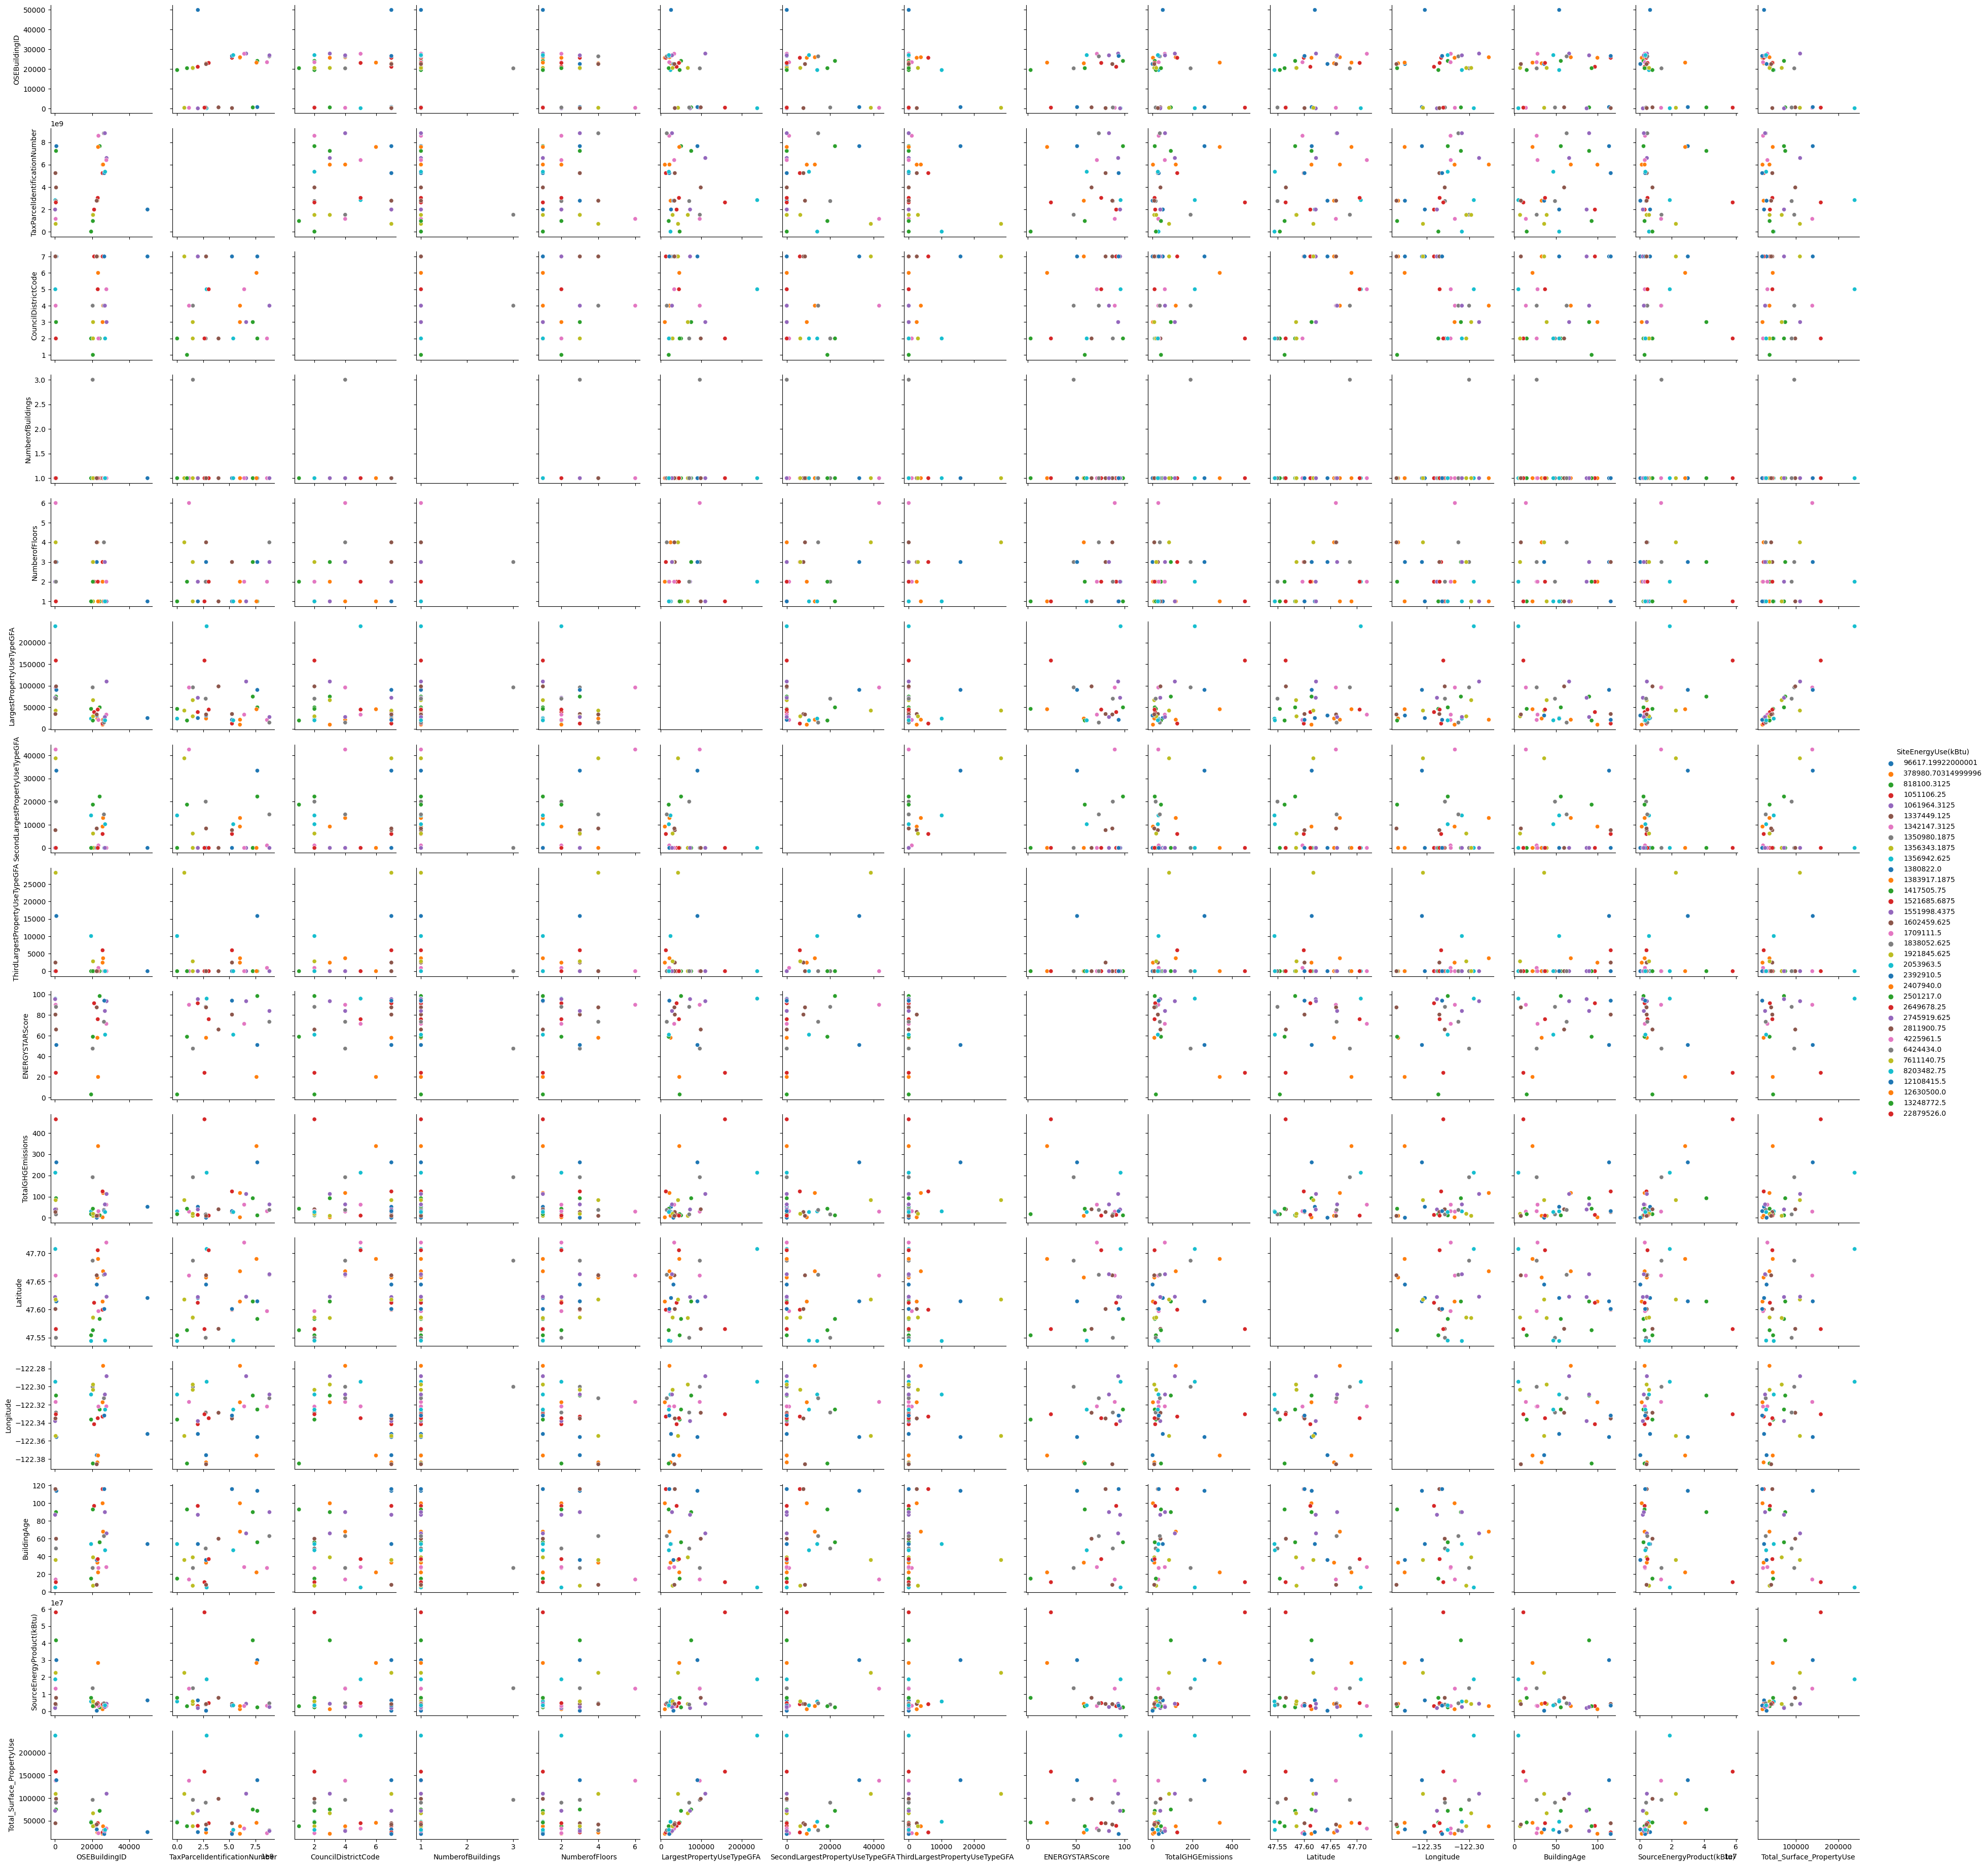

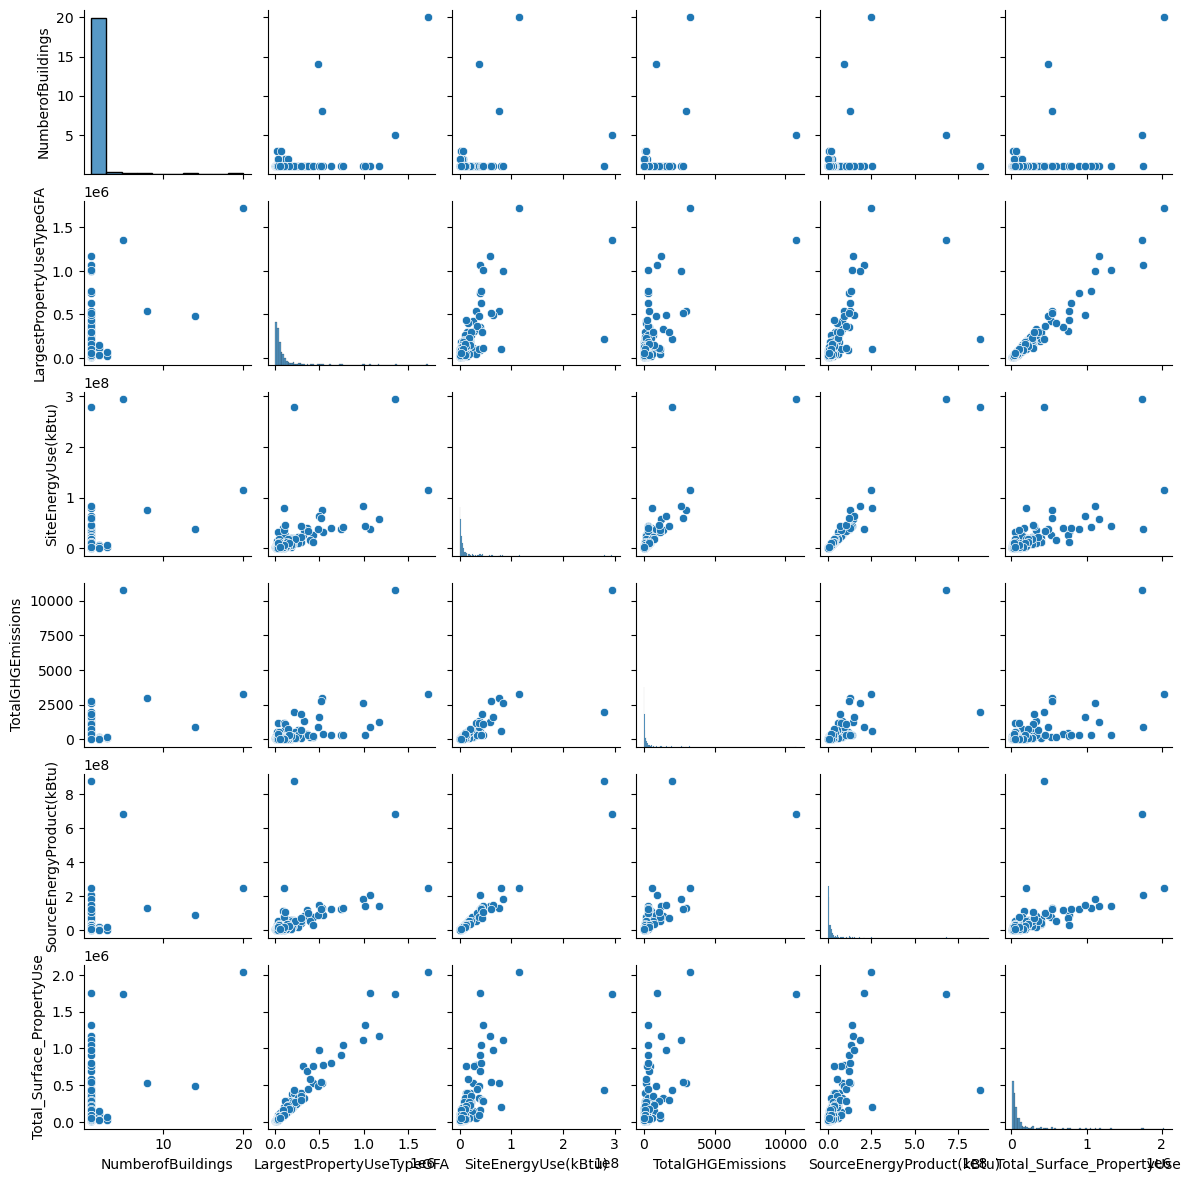

In [68]:
sns.pairplot(data_clean_mean_year.sample(frac = 0.02),hue="SiteEnergyUse(kBtu)", palette = 'tab10')
corr = data_clean_mean_year.corr()
corr_columns = corr.columns[((corr < 1) & (corr > 0.6)).any(axis=0)]
display(corr_columns)
sns.pairplot(data_clean_mean_year[corr_columns].sample(frac = 0.2), height = 2)
plt.show()

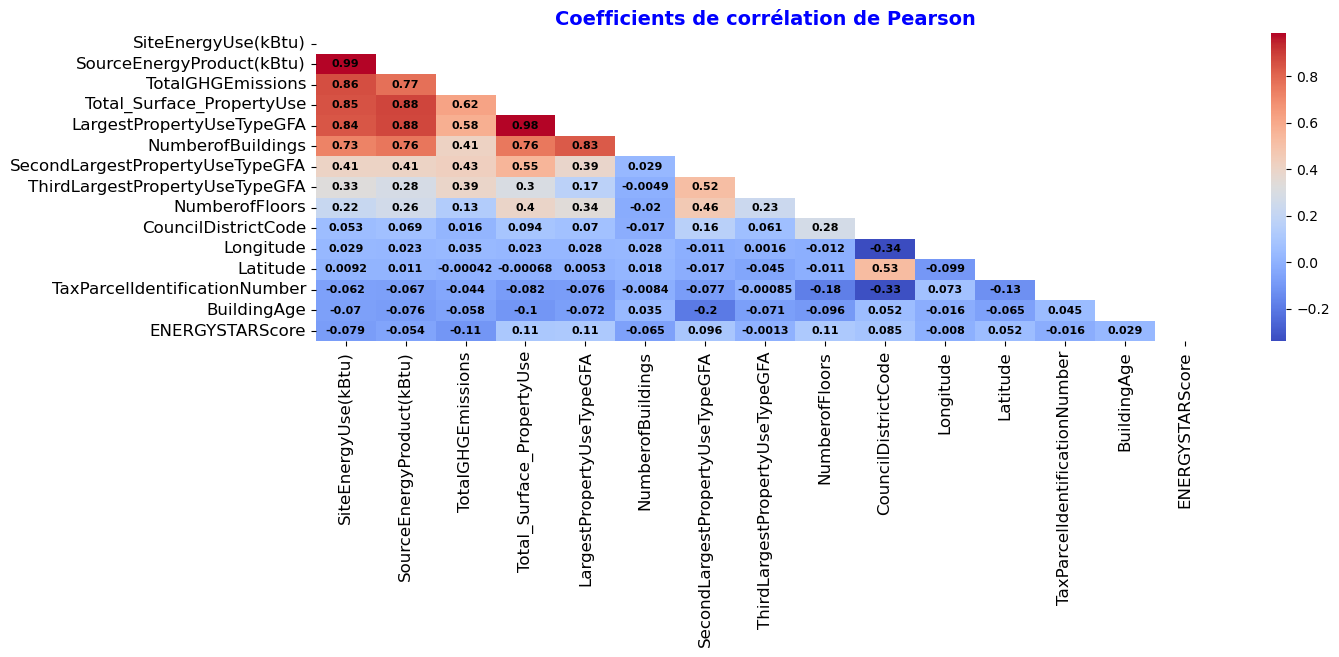

In [69]:
mat_cor(data_clean_final,sort_var='SiteEnergyUse(kBtu)')

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Nous remarquons que les variables à prédire <span STYLE="color:gray;" ><i> 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)'</i></span> sont fortement corrélées. De plus, nous observons d'autres fortes corrélations sur le heatmap qui peuvent amener des problèmes de colinéarié lors de la modélisation. Les paires de variables avec des corrélations de Pearson supérieurs à 0.7  

# <a STYLE="color:black;padding-left:0em" id="4.4">4.4 Projection des bâtiments sur la carte de Seattle

In [70]:
import folium

#Coordonnées du centre de Seattle
seattle_lat = 47.6062 #(47°,36')
seattle_lon = -122.3321 #(-122°,20')

map_seattle = folium.Map()
map_seattle = folium.Map(location=[data_clean_final['Latitude'].mean(), data_clean_final['Longitude'].mean()],zoom_start=11)
for i in range(0,len(data_clean_final)):
    folium.Circle([data_clean_final.iloc[i]['Latitude'],
                                        data_clean_final.iloc[i]['Longitude']],radius =1,fill=True).add_to(map_seattle)
folium.Circle([seattle_lat,seattle_lon],radius =5, fill=True,color = 'red').add_to(map_seattle)

map_seattle

In [71]:
def distance_center(DF):

#Coordonnées du centre de Seattle
    seattle_lat = 47.6062 #(47°,36')
    seattle_lon = -122.3321 #(-122°,20')
    DF['dX_center'] = (40000*DF['Latitude'].apply(cos)/360)*(DF['Longitude']-seattle_lon)
    DF['dY_center'] = 40000*(DF['Latitude']-seattle_lat)/360
#     DF['D_center'] = (DF['dX_center']**2 + DF['dy_center']**2).apply(sqrt) 
    return DF

data_clean_final = distance_center(data_clean_final)

# <a STYLE="color:black;padding-left:0em" id="5">Etape 5 : Finalisation du jeux de donnée

In [72]:
data_clean_final[data_clean_final['LargestPropertyUseTypeGFA'] >= 9.320156e+06]

OSEBuildingID BuildingType PrimaryPropertyType  \
1657         49967       Campus          University   

      TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
1657                     1625049001                  4.0    NORTHEAST   

      NumberofBuildings  NumberofFloors ListOfAllPropertyUseTypes  \
1657              111.0             1.0        College/University   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
1657     College/University                  9320156.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
1657               No information                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
1657              No information                             0.0   

      ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  \
1657              NaN          873923712.0           11140.56  47.65644   

      Longitude ElectricityUse NaturalGasUse SteamUseUse  BuildingAge  \
1657 -122.31041              1             0           1        116.0   

      SourceEnergyProduct(kBtu)  Total_Surface_PropertyUse  \
1657               2.297544e+09                  9320156.0   

     Cat_LargestPropertyUseType Cat_SecondLargestPropertyUseType  \
1657                  Education                   No information   

     Cat_ThirdLargestPropertyUseType  dX_center  dY_center  
1657                  No information  -2.076251   5.582222

BuildingType                           5
Neighborhood                          13
NumberofFloors                        44
LargestPropertyUseTypeGFA           1583
SecondLargestPropertyUseTypeGFA      712
ThirdLargestPropertyUseTypeGFA       311
ENERGYSTARScore                      193
SiteEnergyUse(kBtu)                 1684
TotalGHGEmissions                   1665
ElectricityUse                         2
NaturalGasUse                          2
SteamUseUse                            2
BuildingAge                          113
Cat_LargestPropertyUseType            13
Cat_SecondLargestPropertyUseType      14
Cat_ThirdLargestPropertyUseType       13
dX_center                           1645
dY_center                           1644
dtype: int64

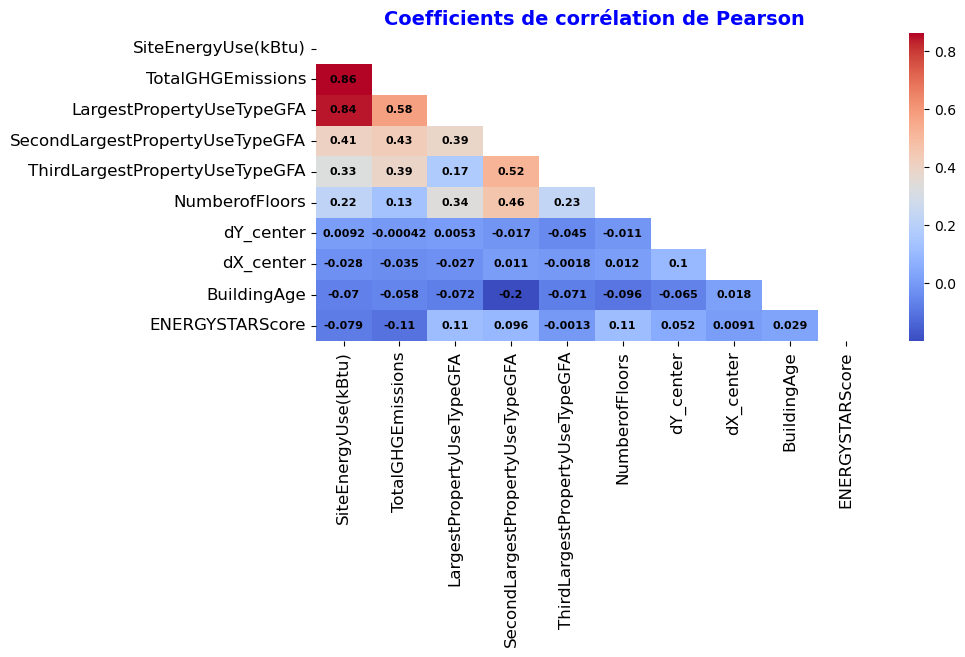

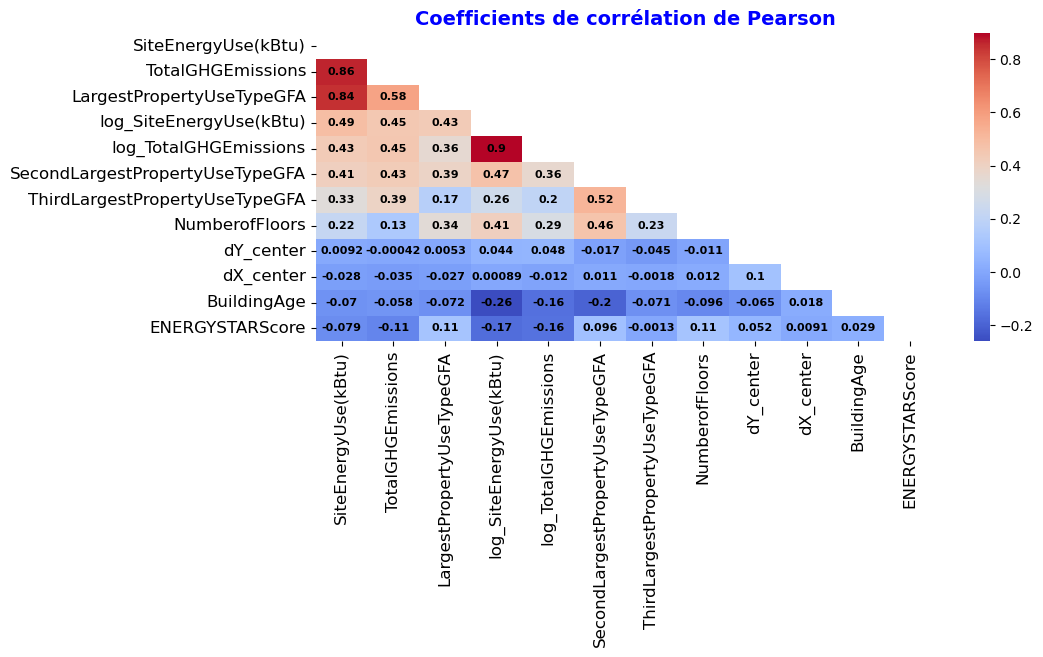

In [73]:
data_final = Supp_cols(data_clean_final,['NumberofBuildings','ListOfAllPropertyUseTypes','Total_Surface_PropertyUse',
                                         'TaxParcelIdentificationNumber','LargestPropertyUseType',
                                         'SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
                                         'SourceEnergyProduct(kBtu)','PrimaryPropertyType','CouncilDistrictCode','Latitude',
                                        'Longitude','OSEBuildingID'])

display(data_final.nunique())
mat_cor(data_final,sort_var='SiteEnergyUse(kBtu)')
data_final['log_SiteEnergyUse(kBtu)'] = np.log(data_final['SiteEnergyUse(kBtu)'])
data_final['log_TotalGHGEmissions'] = np.log(data_final['TotalGHGEmissions'])
mat_cor(data_final,sort_var='SiteEnergyUse(kBtu)')

# <a STYLE="color:black;padding-left:0em" id="6">Etape 6 : Export du jeu de donnée

In [74]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1697
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BuildingType                      1684 non-null   object 
 1   Neighborhood                      1684 non-null   object 
 2   NumberofFloors                    1684 non-null   float64
 3   LargestPropertyUseTypeGFA         1684 non-null   float64
 4   SecondLargestPropertyUseTypeGFA   1684 non-null   float64
 5   ThirdLargestPropertyUseTypeGFA    1684 non-null   float64
 6   ENERGYSTARScore                   1148 non-null   float64
 7   SiteEnergyUse(kBtu)               1684 non-null   float64
 8   TotalGHGEmissions                 1684 non-null   float64
 9   ElectricityUse                    1684 non-null   object 
 10  NaturalGasUse                     1684 non-null   object 
 11  SteamUseUse                       1684 non-null   object 
 12  Buildi

In [75]:
data_final.to_csv('P03_Dataset_clean.csv',index=False)